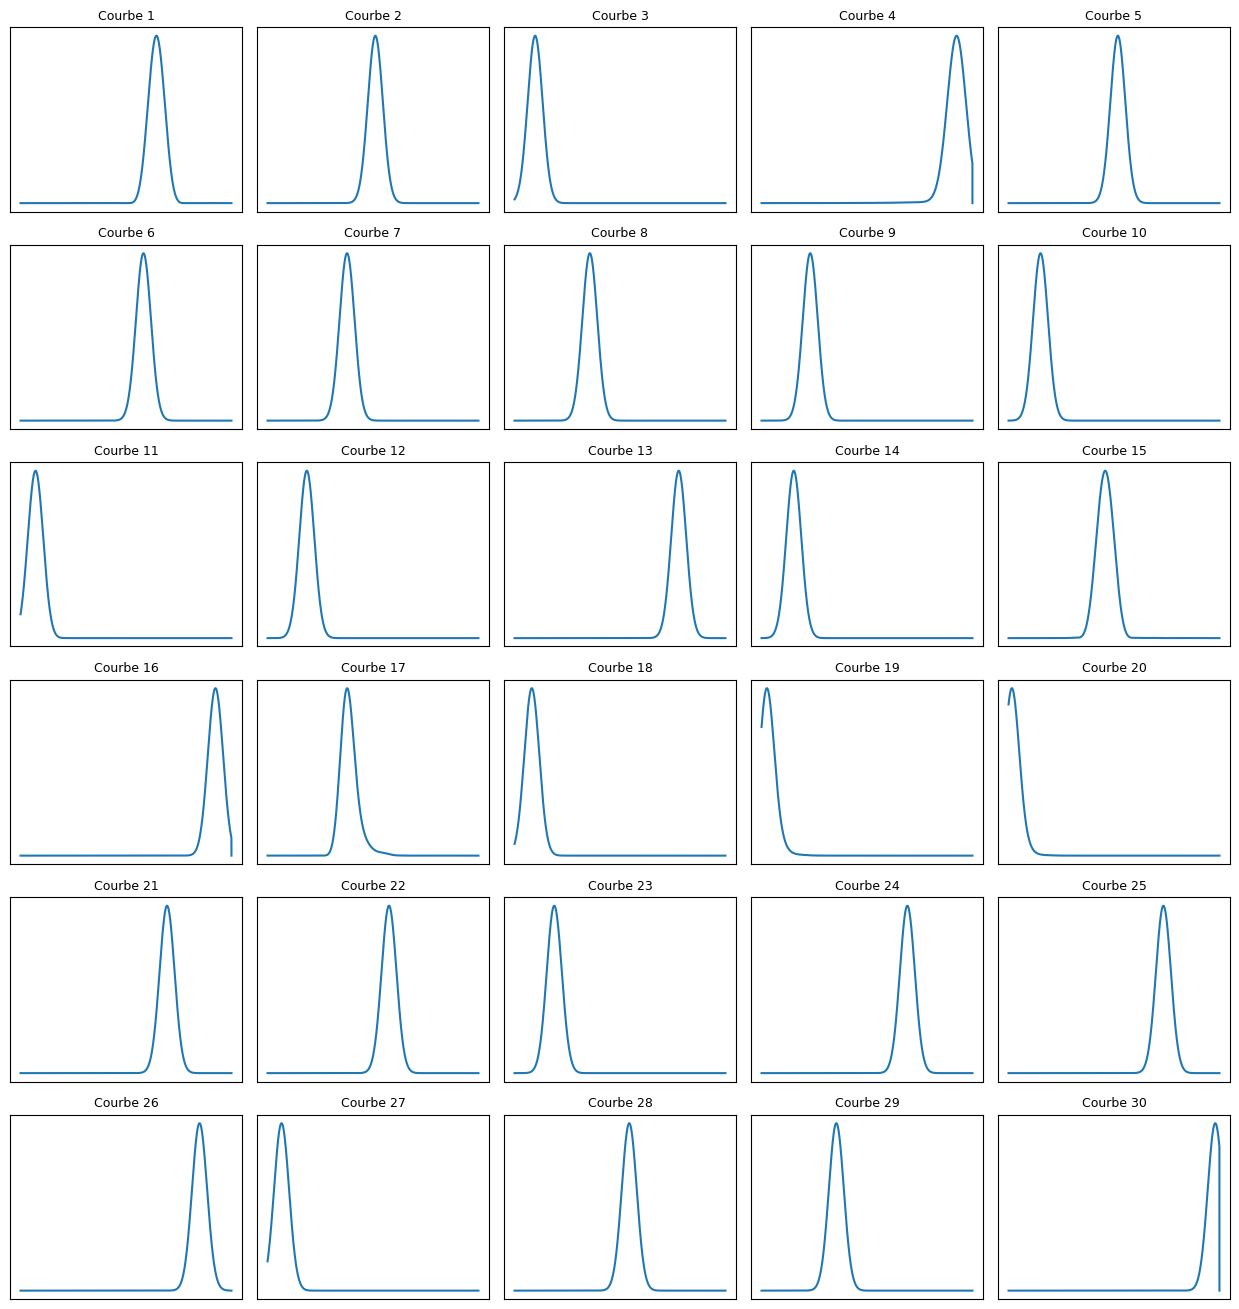

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données
X_data = np.load('data/X_data_array_5000.npy')
y_data = np.load('data/y_data_array_5000.npy')

# Réduction de Y : on prend 1 point sur 10 (axis=1)
#y_data = y_data[:, ::10]  # (n, 500)

# Affichage des 30 premières courbes, une par subplot
n_examples = 30
n_cols = 5
n_rows = 6

plt.figure(figsize=(2.5*n_cols, 2.2*n_rows))
for i in range(n_examples):
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(np.arange(1, 5001), y_data[i])
    plt.title(f"Courbe {i+1}", fontsize=9)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()


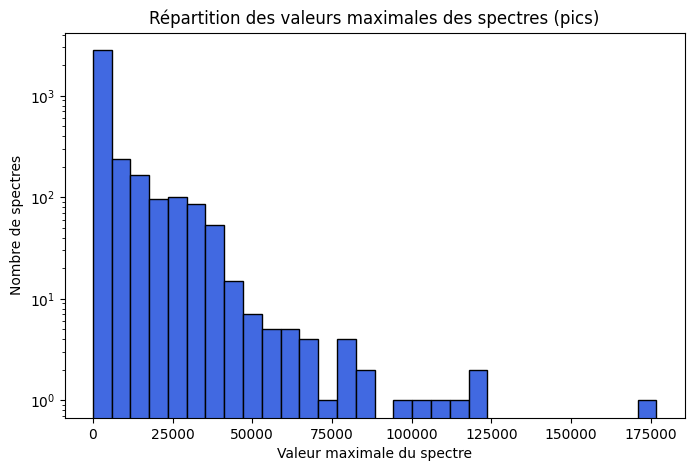

In [6]:
# Calcul des valeurs maximales pour chaque spectre
max_values = np.max(y_data, axis=1)

# Affichage de l'histogramme des valeurs maximales
plt.figure(figsize=(8, 5))
plt.hist(max_values, bins=30, color='royalblue', edgecolor='black')
plt.yscale('log')
plt.xlabel("Valeur maximale du spectre")
plt.ylabel("Nombre de spectres")
plt.title("Répartition des valeurs maximales des spectres (pics)")
plt.show()

In [8]:
print("Min:", np.min(max_values))
print("Max:", np.max(max_values))
print("Moyenne:", np.mean(max_values))
print("Médiane:", np.median(max_values))

Min: 0.010001136
Max: 176696.14
Moyenne: 5312.8936
Médiane: 324.75403


# ----------------------------------------------------------------------------------------------------------------------------------------

In [3]:
import pandas as pd

dataset = pd.read_csv('C:\\Users\\gabriel.legros\\Documents\\VSCode\\Github\\C2N\\CVAE\\data\\NN_training_combine_new.csv')
print("Shape :", dataset.shape)
print("Colonnes :", dataset.columns.tolist())
print(dataset.head(20))
print(dataset.describe())

Shape : (9801, 16)
Colonnes : ['w', 'DC', 'pitch', 'k', 'E_5000', 'E_500', 'E_50', 'nombre_de_pics_5000', 'peak0_5000', 'peak1_5000', 'nombre_de_pics_500', 'peak0_500', 'peak1_500', 'nombre_de_pics_50', 'peak0_50', 'peak1_50']
        w    DC  pitch             k  \
0   568.0  0.79  443.0  4.396811e+06   
1   569.0  0.38  593.0  4.873972e+06   
2   568.0  0.63  494.0  4.578839e+06   
3   568.0  0.63  291.0  6.477511e+06   
4   568.0  0.34  566.0  3.996372e+06   
5   568.0  0.59  485.0  5.311559e+06   
6   568.0  0.45  333.0  7.358685e+06   
7   567.0  0.79  471.0  4.669034e+06   
8   568.0  0.25  412.0  6.252684e+06   
9   567.0  0.66  277.0  7.485383e+06   
10  567.0  0.51  552.0  5.349814e+06   
11  567.0  0.40  464.0  5.958193e+06   
12  566.0  0.38  388.0  6.477511e+06   
13  566.0  0.26  298.0  5.692819e+06   
14  564.0  0.78  482.0  5.474975e+06   
15  565.0  0.77  591.0  3.189434e+06   
16  565.0  0.60  566.0  4.329403e+06   
17  565.0  0.56  329.0  9.166957e+06   
18  564.0  0.

In [6]:
# Affiche le nom des colonnes du DataFrame
print(dataset.columns.tolist())

['w', 'DC', 'pitch', 'k', 'E_5000', 'E_500', 'E_50', 'nombre_de_pics_5000', 'peak0_5000', 'peak1_5000', 'nombre_de_pics_500', 'peak0_500', 'peak1_500', 'nombre_de_pics_50', 'peak0_50', 'peak1_50']


In [4]:
# Affichage du min et max pour les 4 premières colonnes
for col in ['w', 'DC', 'pitch', 'k']:
    min_val = dataset[col].min()
    max_val = dataset[col].max()
    print(f"{col} : min = {min_val}, max = {max_val}")

w : min = 200.0, max = 600.0
DC : min = 0.1, max = 0.9
pitch : min = 100.0, max = 600.0
k : min = 1570796.326794896, max = 31415926.53589793


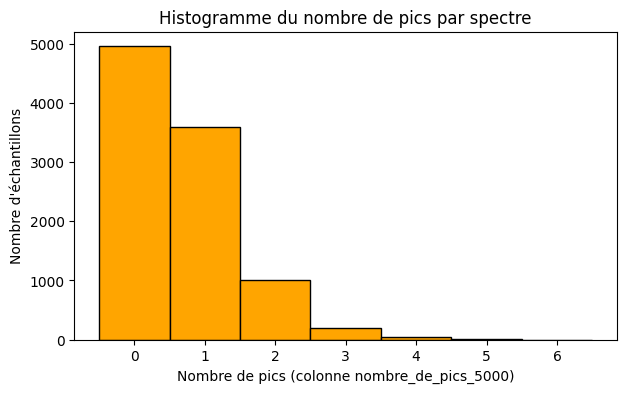

In [5]:
# Affichage de l'histogramme du nombre de pics
plt.figure(figsize=(7, 4))
plt.hist(dataset['nombre_de_pics_5000'], bins=range(int(dataset['nombre_de_pics_5000'].min()), int(dataset['nombre_de_pics_5000'].max())+2), color='orange', edgecolor='black', align='left')
plt.xlabel("Nombre de pics (colonne nombre_de_pics_5000)")
plt.ylabel("Nombre d'échantillons")
plt.title("Histogramme du nombre de pics par spectre")
plt.xticks(range(int(dataset['nombre_de_pics_5000'].min()), int(dataset['nombre_de_pics_5000'].max())+1))
plt.show()

In [7]:
# Création d'une copie du dataset avec uniquement les colonnes souhaitées
colonnes_a_garder = ['w', 'DC', 'pitch', 'k', 'E_5000', 'nombre_de_pics_5000']
dataset_reduit = dataset[colonnes_a_garder].copy()

print(dataset_reduit.head())

       w    DC  pitch             k  \
0  568.0  0.79  443.0  4.396811e+06   
1  569.0  0.38  593.0  4.873972e+06   
2  568.0  0.63  494.0  4.578839e+06   
3  568.0  0.63  291.0  6.477511e+06   
4  568.0  0.34  566.0  3.996372e+06   

                                              E_5000  nombre_de_pics_5000  
0  [0.0003853956510593869, 0.0003840104950771953,...                    1  
1  [0.01549188430145825, 0.01545627737975122, 0.0...                    2  
2  [8.405242663615199e-05, 8.414132968593387e-05,...                    1  
3  [12.77609273103656, 12.97537256380745, 13.1773...                    1  
4  [4.015748174592068e-05, 4.012544489675894e-05,...                    1  


In [16]:
import ast

# Conversion de la colonne E_5000 de string vers liste de floats
dataset_reduit['E_5000'] = dataset_reduit['E_5000'].apply(ast.literal_eval)

# (Optionnel) Pour vérifier le type et la shape du premier élément
print(type(dataset_reduit['E_5000'].iloc[0]))
print(np.array(dataset_reduit['E_5000'].iloc[0]).shape)

ValueError: malformed node or string: [0.0003853956510593869, 0.0003840104950771953, 0.0003825920716065381, 0.0003811407255490555, 0.000379656811786696, 0.0003781406951020268, 0.0003765927500953498, 0.000375013361099181, 0.0003734029220895648, 0.0003717618365947428, 0.000370090517600803, 0.0003683893874546002, 0.0003666588777637943, 0.0003648994292941583, 0.0003631114918640582, 0.0003612955242362589, 0.000359451994006944, 0.0003575813774921203, 0.0003556841596113056, 0.0003537608337685609, 0.0003518119017310447, 0.000349837873504784, 0.0003478392672081058, 0.0003458166089423836, 0.0003437704326604498, 0.0003417012800323817, 0.0003396097003090574, 0.0003374962501831558, 0.0003353614936479477, 0.0003332060018536142, 0.0003310303529614845, 0.0003288351319958061, 0.0003266209306935127, 0.0003243883473516553, 0.0003221379866728587, 0.0003198704596085177, 0.0003175863832001261, 0.0003152863804184087, 0.0003129710800006891, 0.0003106411162860887, 0.0003082971290491073, 0.0003059397633311158, 0.0003035696692702607, 0.0003011875019294121, 0.0002987939211226538, 0.0002963895912397923, 0.0002939751810696129, 0.0002915513636212019, 0.0002891188159440836, 0.0002866782189465795, 0.0002842302572130013, 0.000281775618819261, 0.0002793149951472785, 0.0002768490806980596, 0.0002743785729035373, 0.0002719041719372776, 0.0002694265805239732, 0.0002669465037479941, 0.0002644646488607256, 0.000261981725087149, 0.0002594984434313003, 0.0002570155164810206, 0.0002545336582117394, 0.0002520535837896888, 0.000249576009374148, 0.0002471016519193482, 0.0002446312289754321, 0.0002421654584892398, 0.0002397050586042002, 0.0002372507474601856, 0.0002348032429926729, 0.0002323632627317424, 0.0002299315236008128, 0.0002275087417149849, 0.0002250956321795737, 0.0002226929088880737, 0.0002203012843205874, 0.0002179214693417453, 0.0002155541729992323, 0.0002132001023218986, 0.0002108599621185555, 0.0002085344547765547, 0.0002062242800610678, 0.0002039301349143815, 0.0002016527132558469, 0.0001993927057821362, 0.0001971507997681033, 0.0001949276788681994, 0.0001927240229184978, 0.0001905405077395024, 0.0001883778049395199, 0.0001862365817191104, 0.00018411750067608, 0.0001820212196116904, 0.0001799483913376246, 0.0001778996634840812, 0.0001758756783089745, 0.0001738770725081182, 0.0001719044770269394, 0.0001699585168729016, 0.0001680398109299448, 0.0001661489717734904, 0.0001642866054876436, 0.0001624533114831609, 0.0001606496823175017, 0.0001588763035160787, 0.0001571337533953201, 0.000155422602887371, 0.0001537434153664699, 0.0001520967464772483, 0.0001504831439646539, 0.000148903147506026, 0.0001473572885447993, 0.0001458460901265566, 0.0001443700667366893, 0.0001429297241406338, 0.0001415255592257174, 0.0001401580598457093, 0.0001388277046671102, 0.0001375349630181715, 0.0001362802947398286, 0.0001350641500393559, 0.0001338869693461671, 0.0001327491831702456, 0.0001316512119630389, 0.0001305934659807726, 0.0001295763451506702, 0.0001286002389393553, 0.0001276655262243969, 0.0001267725751682123, 0.00012592174309492, 0.0001251133763699239, 0.00012434781028234, 0.0001236253689302952, 0.0001229463651091515, 0.0001223111002026473, 0.0001217198640770731, 0.000121172934978388, 0.00012067057943248, 0.0001202130521484439, 0.0001198005959250089, 0.0001194334415601139, 0.0001191118077636507, 0.000118835901073453, 0.0001186059157744922, 0.0001184220338213736, 0.0001182844247640896, 0.0001181932456771753, 0.0001181486410921174, 0.000118150742933245, 0.0001181996704569099, 0.0001182955301942137, 0.0001184384158970686, 0.0001186284084878103, 0.0001188655760122526, 0.0001191499735962761, 0.000119481643405934, 0.0001198606146110983, 0.000120286903352696, 0.00012076051271348, 0.0001212814326924453, 0.0001218496401827924, 0.0001224650989535861, 0.0001231277596349529, 0.0001238375597070369, 0.0001245944234924734, 0.0001253982621526664, 0.0001262489736876109, 0.0001271464429394862, 0.0001280905415998625, 0.0001290811282206599, 0.0001301180482287338, 0.0001312011339442129, 0.0001323302046024827, 0.0001335050663799187, 0.0001347255124232691, 0.0001359913228827587, 0.0001373022649488899, 0.000138658092892902, 0.0001400585481109862, 0.0001415033591720586, 0.0001429922418693816, 0.0001445248992756472, 0.0001461010218019237, 0.0001477202872600634, 0.0001493823609289061, 0.0001510868956239801, 0.0001528335317709337, 0.0001546218974824454, 0.0001564516086388472, 0.000158322268972187, 0.0001602334701539637, 0.0001621847918862988, 0.0001641758019967078, 0.000166206056536287, 0.0001682750998814406, 0.0001703824648390411, 0.0001725276727549548, 0.0001747102336261625, 0.0001769296462159475, 0.0001791853981728346, 0.0001814769661524476, 0.0001838038159430342, 0.0001861654025939942, 0.0001885611705477902, 0.0001909905537750509, 0.0001934529759127946, 0.0001959478504058884, 0.0001984745806515494, 0.000201032560146953, 0.0002036211726399003, 0.0002062397922824647, 0.0002088877837876086, 0.0002115645025887925, 0.0002142692950023541, 0.0002170014983929105, 0.0002197604413413888, 0.0002225454438159774, 0.0002253558173457434, 0.0002281908651968623, 0.0002310498825517381, 0.0002339321566902635, 0.0002368369671742611, 0.0002397635860337289, 0.0002427112779561656, 0.0002456793004778868, 0.0002486669041778178, 0.0002516733328738092, 0.0002546978238206925, 0.0002577396079112943, 0.000260797909878724, 0.0002638719485016837, 0.0002669609368109257, 0.000270064082298572, 0.0002731805871285646, 0.0002763096483497131, 0.0002794504581100029, 0.0002826022038730705, 0.0002857640686362319, 0.0002889352311500489, 0.0002921148661398963, 0.0002953021445284683, 0.0002984962336605073, 0.0003016962975280809, 0.0003049014969982176, 0.0003081109900408229, 0.0003113239319587281, 0.0003145394756183035, 0.0003177567716814146, 0.000320974968838618, 0.0003241932140428168, 0.0003274106527445741, 0.0003306264291275363, 0.0003338396863452933, 0.0003370495667585163, 0.0003402552121729814, 0.0003434557640782508, 0.0003466503638866714, 0.0003498381531730464, 0.00035301827391464, 0.0003561898687314896, 0.0003593520811270641, 0.0003625040557290624, 0.0003656449385304101, 0.0003687738771302796, 0.0003718900209751384, 0.0003749925215997517, 0.0003780805328680235, 0.0003811532112136658, 0.0003842097158805887, 0.0003872492091629922, 0.0003902708566449877, 0.0003932738274398607, 0.0003962572944286492, 0.0003992204344983226, 0.0004021624287790609, 0.0004050824628809894, 0.000407979727130002, 0.0004108534168027431, 0.0004137027323606447, 0.0004165268796829555, 0.0004193250702987168, 0.0004220965216175639, 0.0004248404571593248, 0.0004275561067824079, 0.0004302427069107481, 0.0004328995007594044, 0.0004355257385587413, 0.0004381206777768972, 0.0004406835833409066, 0.0004432137278558685, 0.000445710391822677, 0.000448172863853676, 0.0004506004408866814, 0.0004529924283969291, 0.0004553481406071443, 0.0004576669006954461, 0.0004599480410013347, 0.0004621909032292165, 0.0004643948386500351, 0.0004665592083003083, 0.0004686833831790333, 0.0004707667444420469, 0.0004728086835939653, 0.0004748086026775896, 0.0004767659144607399, 0.0004786800426203818, 0.0004805504219241656, 0.0004823764984090706, 0.0004841577295573578, 0.0004858935844696006, 0.0004875835440347855, 0.0004892271010974713, 0.0004908237606219252, 0.0004923730398531244, 0.000493874468474723, 0.0004953275887637366, 0.000496731955742108, 0.0004980871373248986, 0.0004993927144651994, 0.0005006482812957546, 0.000501853445266919, 0.0005030078272815118, 0.0005041110618258636, 0.0005051627970974258, 0.00050616269512887, 0.0005071104319083916, 0.0005080056974964481, 0.0005088481961388535, 0.0005096376463757836, 0.000510373781147609, 0.0005110563478961241, 0.000511685108662646, 0.0005122598401817279, 0.0005127803339710807, 0.0005132463964177651, 0.0005136578488598547, 0.0005140145276647692, 0.0005143162843028523, 0.0005145629854174836, 0.0005147545128905664, 0.0005148907639043036, 0.0005149716509984721, 0.0005149971021237977, 0.0005149670606908202, 0.0005148814856148941, 0.0005147403513565262, 0.0005145436479578665, 0.0005142913810745298, 0.0005139835720033655, 0.0005136202577058584, 0.0005132014908270359, 0.0005127273397103248, 0.0005121978884076476, 0.0005116132366856317, 0.0005109735000268862, 0.0005102788096274637, 0.0005095293123893594, 0.000508725170909071, 0.0005078665634614975, 0.0005069536839793229, 0.0005059867420285517, 0.0005049659627785406, 0.0005038915869690625, 0.0005027638708714757, 0.0005015830862465986, 0.0005003495202976335, 0.000499063475618575, 0.0004977252701388854, 0.0004963352370627469, 0.0004948937248050417, 0.0004934010969219807, 0.000491857732038112, 0.0004902640237683748, 0.0004886203806363814, 0.000486927225987802, 0.0004851849978999713, 0.0004833941490867536, 0.0004815551467994383, 0.0004796684727232393, 0.000477734622869596, 0.0004757541074642109, 0.0004737274508310036, 0.000471655191271802, 0.0004695378809419073, 0.0004673760857215797, 0.0004651703850834421, 0.0004629213719557562, 0.0004606296525817846, 0.0004582958463750207, 0.0004559205857705972, 0.0004535045160726647, 0.0004510482952979138, 0.0004485525940152576, 0.0004460180951816412, 0.000443445493974181, 0.0004408354976183599, 0.0004381888252128003, 0.0004355062075500975, 0.0004327883869342302, 0.0004300361169943634, 0.0004272501624949886, 0.0004244312991428283, 0.0004215803133900456, 0.0004186980022342946, 0.0004157851730152594, 0.0004128426432080218, 0.0004098712402131691, 0.0004068718011436606, 0.000403845172608633, 0.0004007922104941865, 0.0003977137797409018, 0.0003946107541187933, 0.0003914840159989452, 0.000388334456122606, 0.0003851629733673567, 0.0003819704745105195, 0.0003787578739900565, 0.0003755260936626608, 0.0003722760625594881, 0.0003690087166392605, 0.0003657249985390931, 0.0003624258573228066, 0.0003591122482271734, 0.000355785132405666, 0.0003524454766703636, 0.0003490942532315146, 0.0003457324394352092, 0.0003423610174991665, 0.0003389809742464367, 0.0003355933008375739, 0.0003321989925008271, 0.0003287990482608454, 0.0003253944706657018, 0.0003219862655124404, 0.0003185754415711481, 0.0003151630103077442, 0.0003117499856053379, 0.0003083373834845279, 0.000304926221822407, 0.0003015175200706644, 0.0002981122989725084, 0.0002947115802789094, 0.0002913163864637789, 0.0002879277404385529, 0.0002845466652660734, 0.0002811741838737292, 0.0002778113187663703, 0.0002744590917384402, 0.0002711185235860107, 0.0002677906338184174, 0.00026447644036968, 0.0002611769593099174, 0.0002578932045565582, 0.0002546261875857382, 0.0002513769171437674, 0.0002481463989587147, 0.0002449356354524827, 0.0002417456254529856, 0.0002385773639070162, 0.0002354318415934501, 0.0002323100448372198, 0.0002292129552238006, 0.0002261415493146401, 0.0002230967983633659, 0.0002200796680328212, 0.0002170911181133731, 0.0002141321022420301, 0.0002112035676228985, 0.0002083064547489194, 0.0002054416971247552, 0.0002026102209913704, 0.0001998129450518102, 0.0001970507801987903, 0.0001943246292438324, 0.0001916353866480964, 0.0001889839382551664, 0.0001863711610255487, 0.0001837979227732912, 0.0001812650819045667, 0.0001787734871583557, 0.0001763239773494778, 0.0001739173811136262, 0.0001715545166550874, 0.0001692361914966213, 0.000166963202231916, 0.0001647363342807857, 0.0001625563616466341, 0.0001604240466771516, 0.0001583401398273046, 0.000156305379425562, 0.0001543204914428471, 0.0001523861892645813, 0.0001505031734658222, 0.0001486721315894623, 0.0001468937379277295, 0.0001451686533069159, 0.0001434975248755217, 0.0001418809858956644, 0.0001403196555381841, 0.0001388141386811021, 0.000137365025711773, 0.0001359728923326918, 0.0001346382993710962, 0.0001333617925921428, 0.000132143902516296, 0.0001309851442402419, 0.0001298860172620055, 0.0001288470053101519, 0.0001278685761766833, 0.0001269511815546594, 0.0001260952568794102, 0.0001253012211744398, 0.0001245694769013683, 0.0001239004098143194, 0.0001232943888186797, 0.0001227517658342889, 0.0001222728756631306, 0.0001218580358615599, 0.0001215075466170886, 0.000121221690629826, 0.0001210007329985382, 0.0001208449211114623, 0.0001207544845418472, 0.0001207296349482447, 0.0001207705659796898, 0.0001208774531856883, 0.0001210504539310909, 0.000121289707315958, 0.0001215953341002931, 0.0001219674366338406, 0.0001224060987908661, 0.0001229113859099834, 0.0001234833447390776, 0.0001241220033853018, 0.0001248273712702216, 0.0001255994390900811, 0.0001264381787812632, 0.000127343543490932, 0.0001283154675528484, 0.0001293538664684739, 0.000130458636893251, 0.0001316296566281767, 0.000132866784616633, 0.0001341698609464715, 0.0001355387068574531, 0.000136973124753887, 0.0001384728982226753, 0.0001400377920565806, 0.0001416675522828697, 0.0001433619061972456, 0.0001451205624030862, 0.0001469432108560542, 0.0001488295229139295, 0.0001507791513918677, 0.0001527917306228692, 0.0001548668765235932, 0.000157004186665487, 0.0001592032403511345, 0.000161463598695941, 0.0001637848047150793, 0.0001661663834155783, 0.0001686078418938457, 0.0001711086694381847, 0.0001736683376366504, 0.0001762863004900844, 0.0001789619945301847, 0.0001816948389428784, 0.0001844842356966634, 0.0001873295696761185, 0.0001902302088204293, 0.00019318550426699, 0.0001961947904999062, 0.0001992573855036186, 0.0002023725909213111, 0.0002055396922183095, 0.0002087579588503288, 0.000212026644436499, 0.0002153449869372805, 0.0002187122088370148, 0.0002221275173312837, 0.0002255901045188419, 0.000229099147598248, 0.0002326538090690455, 0.0002362532369374098, 0.0002398965649263832, 0.0002435829126905066, 0.000247311386034696, 0.0002510810771377288, 0.0002548910647796788, 0.0002587404145738067, 0.0002626281792025858, 0.0002665533986575806, 0.0002705151004838549, 0.0002745123000278062, 0.0002785440006893674, 0.0002826091941778957, 0.0002867068607717134, 0.0002908359695817919, 0.00029499547881856, 0.0002991843360628466, 0.0003034014785399482, 0.0003076458333973872, 0.0003119163179859896, 0.000316211840144261, 0.0003205312984860692, 0.0003248735826914434, 0.0003292375738005206, 0.0003336221445104825, 0.0003380261594754267, 0.0003424484756091682, 0.0003468879423907715, 0.0003513434021727883, 0.0003558136904922217, 0.0003602976363838445, 0.0003647940626962407, 0.0003693017864099923, 0.0003738196189582855, 0.0003783463665497783, 0.0003828808304934382, 0.0003874218075254922, 0.0003919680901385396, 0.0003965184669120525, 0.0004010717228451528, 0.0004056266396908761, 0.0004101819962917322, 0.0004147365689175536, 0.0004192891316038234, 0.0004238384564918861, 0.000428383314170596, 0.0004329224740182406, 0.0004374547045465036, 0.0004419787737448152, 0.0004464934494254656, 0.000450997499570042, 0.0004554896926759616, 0.0004599687981037424, 0.0004644335864250889, 0.0004688828297707956, 0.0004733153021793323, 0.0004777297799455289, 0.0004821250419692505, 0.0004864998701041724, 0.0004908530495064113, 0.0004951833689829203, 0.0004994896213396808, 0.0005037706037293587, 0.0005080251179985767, 0.0005122519710345727, 0.0005164499751110778, 0.0005206179482335406, 0.0005247547144833378, 0.0005288591043610854, 0.0005329299551288194, 0.0005369661111509717, 0.000540966424234185, 0.0005449297539655543, 0.0005488549680495651, 0.0005527409426433796, 0.0005565865626904507, 0.0005603907222524203, 0.0005641523248390616, 0.0005678702837363576, 0.0005715435223325095, 0.0005751709744416699, 0.0005787515846256743, 0.0005822843085131332, 0.0005857681131163753, 0.0005892019771456823, 0.0005925848913208825, 0.0005959158586804386, 0.0005991938948874816, 0.0006024180285330915, 0.0006055873014365814, 0.0006087007689426245, 0.0006117575002153113, 0.0006147565785289176, 0.000617697101555228, 0.0006205781816476439, 0.0006233989461215448, 0.0006261585375311709, 0.0006288561139428429, 0.0006314908492042683, 0.0006340619332101585, 0.0006365685721638004, 0.0006390099888346043, 0.0006413854228116534, 0.0006436941307529487, 0.0006459353866304813, 0.0006481084819708971, 0.0006502127260918615, 0.0006522474463338139, 0.0006542119882872058, 0.000656105716015148, 0.0006579280122713229, 0.000659678278713011, 0.0006613559361095612, 0.0006629604245455404, 0.0006644912036192493, 0.0006659477526360709, 0.0006673295707965584, 0.0006686361773796462, 0.0006698671119203284, 0.0006710219343822417, 0.0006721002253247716, 0.0006731015860648126, 0.0006740256388329815, 0.0006748720269243865, 0.0006756404148438156, 0.0006763304884450799, 0.0006769419550651044, 0.0006774745436517654, 0.0006779280048863109, 0.0006783021112999265, 0.000678596657384181, 0.0006788114596958125, 0.0006789463569554191, 0.0006790012101402611, 0.0006789759025708463, 0.0006788703399916313, 0.0006786844506454969, 0.0006784181853421283, 0.0006780715175201635, 0.0006776444433032277, 0.0006771369815496598, 0.0006765491738959047, 0.0006758810847939139, 0.0006751328015418479, 0.000674304434308611, 0.0006733961161522834, 0.0006724080030316688, 0.0006713402738118014, 0.0006701931302632163, 0.0006689667970541161, 0.0006676615217369358, 0.0006662775747279946, 0.0006648152492806028, 0.0006632748614521581, 0.0006616567500643906, 0.000659961276657284, 0.00065818882543656, 0.0006563398032147746, 0.0006544146393456566, 0.0006524137856523605, 0.0006503377163491518, 0.0006481869279563231, 0.0006459619392093792, 0.0006436632909611127, 0.0006412915460775204, 0.0006388472893276883, 0.0006363311272666146, 0.0006337436881122954, 0.0006310856216161727, 0.0006283575989272397, 0.000625560312450186, 0.000622694475696825, 0.0006197608231315981, 0.0006167601100109627, 0.0006136931122162454, 0.0006105606260805704, 0.0006073634682100436, 0.0006041024752979572, 0.0006007785039339724, 0.0005973924304068544, 0.0005939451505009176, 0.0005904375792873837, 0.0005868706509093623, 0.0005832453183607754, 0.0005795625532603895, 0.000575823345619276, 0.0005720287036030393, 0.000568179653288479, 0.0005642772384145275, 0.000560322520127786, 0.0005563165767226911, 0.0005522605033762455, 0.000548155411877447, 0.0005440024303515484, 0.000539802702979087, 0.0005355573897098154, 0.0005312676659716368, 0.0005269347223745522, 0.0005225597644096714, 0.0005181440121435394, 0.0005136886999075581, 0.0005091950759828338, 0.0005046644022804477, 0.0005000979540171435, 0.0004954970193866813, 0.0004908628992267708, 0.0004861969066817384, 0.0004815003668610924, 0.000476774616493951, 0.0004720210035794228, 0.0004672408870331855, 0.0004624356363300838, 0.0004576066311432044, 0.0004527552609790799, 0.0004478829248095153, 0.0004429910306999261, 0.0004380809954342686, 0.0004331542441367624, 0.0004282122098904612, 0.0004232563333527247, 0.0004182880623677921, 0.000413308851576391, 0.0004083201620227678, 0.0004033234607588732, 0.0003983202204461754, 0.0003933119189548977, 0.0003883000389610645, 0.000383286067541126, 0.0003782714957647391, 0.0003732578182852574, 0.0003682465329285099, 0.0003632391402797669, 0.0003582371432689877, 0.0003532420467544462, 0.0003482553571051617, 0.0003432785817816323, 0.0003383132289156464, 0.0003333608068888393, 0.0003284228239102768, 0.0003235007875932281, 0.0003185962045310609, 0.0003137105798726476, 0.0003088454168971076, 0.0003040022165881754, 0.0002991824772083847, 0.000294387693872948, 0.0002896193581235909, 0.000284878957502606, 0.000280167975126913, 0.0002754878892624517, 0.0002708401728991481, 0.0002662262933262632, 0.0002616477117084137, 0.0002571058826625172, 0.0002526022538354949, 0.0002481382654830212, 0.0002437153500495511, 0.000239334931749391, 0.0002349984261493145, 0.0002307072397526996, 0.0002264627695851114, 0.0002222664027817938, 0.0002181195161770227, 0.0002140234758952883, 0.0002099796369447164, 0.0002059893428126964, 0.0002020539250637447, 0.000198174702939913, 0.0001943529829637683, 0.000190590058543954, 0.0001868872095837082, 0.0001832457020921621, 0.0001796667877987047, 0.0001761517037706139, 0.0001727016720336993, 0.0001693178991966139, 0.0001660015760783979, 0.0001627538773397725, 0.0001595759611181127, 0.0001564689686661644, 0.0001534340239947972, 0.000150472233519742, 0.0001475846857124391, 0.0001447724507551975, 0.0001420365802006951, 0.0001393781066359069, 0.0001367980433506222, 0.0001342973840106575, 0.000131877102335787, 0.0001295381517825657, 0.000127281465232126, 0.0001251079546830486, 0.0001230185109493833, 0.0001210140033639156, 0.0001190952794868379, 0.0001172631648198424, 0.0001155184625256957, 0.0001138619531535782, 0.000112294394370006, 0.0001108165206956201, 0.0001094290432479479, 0.0001081326494899416, 0.0001069280029847778, 0.0001058157431567981, 0.0001047964850584001, 0.0001038708191436548, 0.0001030393110480095, 0.0001023025013744128, 0.000101660905486319, 0.0001011150133068833, 0.0001006652891250104, 0.0001003121714083292, 0.0001000560726225746, 9.989737905821987e-05, 9.98364506638455e-05, 9.987362088657434e-05, 0.0001000091965195628, 0.0001002434575566188, 0.000100576657053982, 0.0001010090209993555, 0.000101540748188202, 0.0001021720101074089, 0.0001029029508262978, 0.000103733686895093, 0.0001046643072508836, 0.0001056948731310417, 0.0001068254179942894, 0.0001080559474492933, 0.000109386439190925, 0.0001108168429442101, 0.0001123470804159679, 0.000113977045254156, 0.0001157066030150463, 0.0001175355911381362, 0.0001194638189289031, 0.0001214910675493844, 0.0001236170900166325, 0.0001258416112090311, 0.0001281643278804943, 0.000130584908682644, 0.0001331029941947722, 0.000135718196961872, 0.0001384301015405261, 0.000141238264552724, 0.0001441422147476906, 0.0001471414530715932, 0.0001502354527452177, 0.000153423659349597, 0.0001567054909195227, 0.0001600803380450743, 0.0001635475639809399, 0.0001671065047637263, 0.0001707564693371586, 0.0001744967396850779, 0.0001783265709723563, 0.0001822451916936345, 0.0001862518038298009, 0.0001903455830123416, 0.0001945256786953865, 0.0001987912143354552, 0.0002031412875789562, 0.0002075749704572906, 0.0002120913095895696, 0.0002166893263929429, 0.0002213680173004288, 0.0002261263539862485, 0.0002309632835985957, 0.0002358777289998368, 0.0002408685890139957, 0.0002459347386815959, 0.0002510750295217159, 0.0002562882898011997, 0.0002615733248110673, 0.0002669289171498919, 0.0002723538270142382, 0.0002778467924960826, 0.0002834065298869365, 0.0002890317339889446, 0.0002947210784326761, 0.0003004732160014097, 0.0003062867789622238, 0.0003121603794035086, 0.0003180926095787402, 0.0003240820422568738, 0.0003301272310787668, 0.0003362267109199046, 0.0003423789982591349, 0.0003485825915534078, 0.0003548359716185201, 0.0003611376020155371, 0.0003674859294429395, 0.0003738793841345203, 0.0003803163802627192, 0.0003867953163473164, 0.0003933145756695115, 0.0003998725266913547, 0.0004064675234800228, 0.0004130979061372249, 0.0004197620012336442, 0.0004264581222479527, 0.0004331845700105379, 0.0004399396331519249, 0.0004467215885556229, 0.0004535287018150404, 0.0004603592276949761, 0.000467211410597104, 0.0004740834850291214, 0.00048097367607821, 0.000487880199888072, 0.0004948012641392343, 0.0005017350685333678, 0.0005086798052807059, 0.0005156336595904348, 0.0005225948101647277, 0.0005295614296952914, 0.0005365316853628004, 0.000543503739339351, 0.0005504757492930986, 0.0005574458688954122, 0.0005644122483306068, 0.0005713730348074289, 0.0005783263730726871, 0.0005852704059270328, 0.0005922032747421405, 0.0005991231199794727, 0.0006060280817108717, 0.0006129163001401437, 0.0006197859161258412, 0.0006266350717051858, 0.0006334619106188585, 0.0006402645788365573, 0.0006470412250828671, 0.0006537900013640791, 0.0006605090634949564, 0.0006671965716256319, 0.0006738506907688388, 0.0006804695913267377, 0.000687051449617254, 0.000693594448400754, 0.0007000967774053509, 0.0007065566338516203, 0.0007129722229769294, 0.0007193417585582591, 0.0007256634634339685, 0.0007319355700243762, 0.0007381563208506981, 0.0007443239690524523, 0.0007504367789031381, 0.0007564930263239206, 0.0007624909993952867, 0.0007684289988665137, 0.0007743053386627661, 0.0007801183463896428, 0.0007858663638351485, 0.000791547747468854, 0.000797160868938021, 0.0008027041155607605, 0.0008081758908159389, 0.0008135746148296403, 0.0008188987248580885, 0.0008241466757670864, 0.0008293169405074103, 0.0008344080105864376, 0.000839418396535551, 0.0008443466283734498, 0.0008491912560649799, 0.0008539508499754677, 0.0008586240013205053, 0.0008632093226108197, 0.0008677054480923526, 0.0008721110341811316, 0.0008764247598931588, 0.0008806453272687941, 0.0008847714617918356, 0.0008888019128028463, 0.0008927354539070505, 0.0008965708833760926, 0.0009003070245439729, 0.0009039427261970348, 0.0009074768629574272, 0.000910908335660537, 0.0009142360717258574, 0.0009174590255211604, 0.0009205761787202644, 0.0009235865406537124, 0.0009264891486527269, 0.0009292830683860301, 0.000931967394189592, 0.000934541249389092, 0.0009370037866150597, 0.0009393541881104591, 0.000941591666030879, 0.0009437154627368767, 0.0009457248510786577, 0.0009476191346729471, 0.000949397648171624, 0.00095105975752273, 0.0009526048602229956, 0.0009540323855622119, 0.0009553417948592866, 0.0009565325816900367, 0.0009576042721062678, 0.0009585564248462297, 0.0009593886315368231, 0.0009601005168867149, 0.0009606917388705643, 0.0009611619889047431, 0.0009615109920139569, 0.0009617385069885763, 0.0009618443265332218, 0.0009618282774062346, 0.0009616902205496404, 0.0009614300512099348, 0.0009610476990498658, 0.0009605431282504777, 0.0009599163376036872, 0.0009591673605958318, 0.0009582962654812672, 0.0009573031553465152, 0.0009561881681650063, 0.0009549514768417766, 0.0009535932892489461, 0.00095211384825126, 0.0009505134317216802, 0.000948792352547638, 0.0009469509586273121, 0.0009449896328558805, 0.000942908793102147, 0.0009407088921754976, 0.0009383904177825057, 0.0009359538924740244, 0.0009333998735823393, 0.0009307289531483396, 0.0009279417578388112, 0.0009250389488538133, 0.0009220212218242791, 0.0009188893066996286, 0.0009156439676254429, 0.0009122860028112764, 0.0009088162443888459, 0.0009052355582600798, 0.0009015448439353621, 0.0008977450343621366, 0.0008938370957437418, 0.0008898220273482503, 0.0008857008613076972, 0.0008814746624077772, 0.0008771445278678199, 0.0008727115871108024, 0.0008681770015242267, 0.0008635419642113675, 0.0008588076997328703, 0.0008539754638389642, 0.0008490465431924167, 0.0008440222550819885, 0.0008389039471267088, 0.000833692996971012, 0.0008283908119703904, 0.0008229988288684144, 0.0008175185134644885, 0.000811951360272552, 0.0008062988921711036, 0.000800562660044418, 0.0007947442424149898, 0.0007888452450670752, 0.0007828673006623326, 0.0007768120683463839, 0.000770681233347064, 0.0007644765065649359, 0.0007581996241548135, 0.0007518523470998214, 0.0007454364607771094, 0.0007389537745157946, 0.0007324061211471747, 0.000725795356547112, 0.000719123359170936, 0.0007123920295808546, 0.0007056032899660251, 0.0006987590836553899, 0.0006918613746233603, 0.0006849121469885961, 0.0006779134045057926, 0.0006708671700508259, 0.0006637754850991967, 0.0006566404091980565, 0.0006494640194318072, 0.0006422484098814735, 0.0006349956910781356, 0.0006277079894501389, 0.0006203874467647389, 0.0006130362195639723, 0.0006056564785949863, 0.0005982504082349815, 0.0005908202059110005, 0.0005833680815145636, 0.0005758962568113209, 0.00056840696484611, 0.0005609024493431228, 0.0005533849641018208, 0.0005458567723884713, 0.0005383201463234462, 0.0005307773662646068, 0.0005232307201869237, 0.0005156825030582729, 0.0005081350162117938, 0.0005005905667149861, 0.0004930514667355939, 0.0004855200329043751, 0.0004779985856752216, 0.000470489448682548, 0.0004629949480961947, 0.0004555174119739568, 0.0004480591696121333, 0.0004406225508940068, 0.0004332098856365236, 0.0004258235029354561, 0.0004184657305091331, 0.0004111388940407788, 0.0004038453165200127, 0.0003965873175833324, 0.0003893672128538661, 0.000382187313280703, 0.0003750499244779045, 0.0003679573460632142, 0.0003609118709969119, 0.0003539157849209655, 0.0003469713654983733, 0.0003400808817532542, 0.0003332465934117366, 0.0003264707502436517, 0.0003197555914055512, 0.0003131033447849283, 0.0003065162263459905, 0.00029999643947723, 0.000293546174340731, 0.00028716760722369, 0.0002808628998921351, 0.0002746341989471259, 0.0002684836351835783, 0.0002624133229519073, 0.0002564253595226485, 0.0002505218244544255, 0.0002447047789650768, 0.0002389762653064722, 0.0002333383061431052, 0.0002277929039345421, 0.0002223420403220042, 0.0002169876755192096, 0.0002117317477078051, 0.0002065761724373514, 0.0002015228420301162, 0.0001965736249909808, 0.0001917303654225004, 0.000186994882445298, 0.0001823689696239738, 0.0001778543943988649, 0.0001734528975235709, 0.0001691661925085281, 0.0001649959650709329, 0.0001609438725910129, 0.0001570115435747637, 0.0001532005771235789, 0.0001495125424107472, 0.000145948978164915, 0.0001425113921608509, 0.0001392012607176439, 0.0001360200282043678, 0.0001329691065534442, 0.0001300498747819858, 0.000127263678520996, 0.0001246118295528008, 0.0001220956053568577, 0.0001197162486639459, 0.0001174749670189332, 0.0001153729323524378, 0.0001134112805612623, 0.0001115911110978778, 0.0001099134865691424, 0.0001083794323442655, 0.0001069899361722404, 0.0001057459478088413, 0.0001046483786533032, 0.000103698101394909, 0.0001028959496694237, 0.000102242717725611, 0.0001017391601020314, 0.0001013859913141225, 0.0001011838855515362, 0.000101133476386229, 0.0001012353564911375, 0.0001014900773694935, 0.0001018981490950543, 0.0001024600400633499, 0.0001031761767539004, 0.0001040469435035348, 0.0001050726822910477, 0.0001062536925331392, 0.0001075902308917143, 0.0001090825110927515, 0.0001107307037566791, 0.0001125349362404496, 0.0001144952924912897, 0.0001166118129122884, 0.0001188844942398128, 0.0001213132894328794, 0.0001238981075744875, 0.0001266388137850083, 0.0001295352291476877, 0.0001325871306462844, 0.0001357942511149067, 0.000139156279200128, 0.0001426728593353673, 0.0001463435917275732, 0.0001501680323563446, 0.0001541456929853954, 0.0001582760411864146, 0.0001625585003754493, 0.0001669924498617361, 0.0001715772249089792, 0.0001763121168091766, 0.000181196372968977, 0.0001862291970085311, 0.0001914097488728511, 0.0001967371449557841, 0.0002022104582364256, 0.0002078287184281211, 0.0002135909121399354, 0.000219495983050675, 0.0002255428320953276, 0.0002317303176640609, 0.0002380572558135679, 0.0002445224204908792, 0.000251124543769575, 0.000257862316098302, 0.0002647343865616737, 0.0002717393631533225, 0.0002788758130613335, 0.000286142262965787, 0.0002935371993483747, 0.0003010590688141593, 0.000308706278425382, 0.0003164771960471432, 0.0003243701507049987, 0.0003323834329544117, 0.0003405152952619005, 0.0003487639523979136, 0.0003571275818412475, 0.0003656043241949727, 0.0003741922836138235, 0.000382889528242929, 0.0003916940906677249, 0.0004006039683750174, 0.0004096171242251673, 0.0004187314869351645, 0.0004279449515724776, 0.0004372553800597564, 0.0004466606016900265, 0.0004561584136524644, 0.0004657465815684979, 0.0004754228400382323, 0.0004851848931968765, 0.0004950304152812503, 0.000504957051206223, 0.0005149624171507937, 0.0005250441011537027, 0.0005351996637185973, 0.0005454266384286618, 0.0005557225325700491, 0.0005660848277644518, 0.00057651098061079, 0.0005869984233353068, 0.0005975445644502103, 0.0006081467894208432, 0.00061880246134111, 0.0006295089216166845, 0.0006402634906562946, 0.0006510634685708405, 0.0006619061358797082, 0.0006727887542245928, 0.000683708567090639, 0.0006946628005344843, 0.0007056486639189254, 0.0007166633506544076, 0.000727704038946922, 0.000738767892552183, 0.0007498520615355741, 0.0007609536830382227, 0.0007720698820486867, 0.0007831977721800797, 0.0007943344564522058, 0.0008054770280791054, 0.0008166225712612327, 0.0008277681619821949, 0.0008389108688099196, 0.0008500477537023143, 0.0008611758728165822, 0.000872292277322264, 0.0008833940142181578, 0.0008944781271524258, 0.0009055416572456661, 0.0009165816439169142, 0.0009275951257125372, 0.0009385791411375441, 0.0009495307294887289, 0.0009604469316900505, 0.0009713247911300895, 0.0009821613545007053, 0.000992953672636687, 0.00100369880135694, 0.001014393802306657, 0.00102503574379976, 0.001035621701661467, 0.001046148760071432, 0.001056614012406959, 0.001067014562085323, 0.001077347523405658, 0.001087610022390302, 0.001097799197625067, 0.001107912201097915, 0.00111794619903632, 0.001127898372742872, 0.001137765919428908, 0.001147546053045777, 0.001157236005113671, 0.001166833025547881, 0.00117633438348186, 0.00118573736808733, 0.001195039289390789, 0.001204237479086379, 0.001213329291344924, 0.00122231210361876, 0.001231183317442149, 0.00123994035922719, 0.001248580681054842, 0.001257101761460739, 0.001265501106215856, 0.001273776249101541, 0.001281924752678723, 0.001289944209051203, 0.001297832240622664, 0.001305586500847156, 0.001313204674972872, 0.001320684480779203, 0.001328023669306333, 0.001335220025577624, 0.001342271369314377, 0.001349175555642902, 0.001355930475793246, 0.001362534057789915, 0.001368984267134079, 0.001375279107477059, 0.001381416621284886, 0.001387394890493734, 0.001393212037156193, 0.001398866224077863, 0.001404355655444273, 0.001409678577437824, 0.001414833278844673, 0.001419818091651295, 0.001424631391630452, 0.001429271598916471, 0.001433737178569598, 0.001438026641129384, 0.001442138543156603, 0.00144607148776387, 0.001449824125134451, 0.001453395153029421, 0.001456783317282709, 0.001459987412284108, 0.001463006281449801, 0.001465838817680326, 0.00146848396380621, 0.001470940713020588, 0.001473208109298633, 0.001475285247804086, 0.001477171275282671, 0.001478865390441762, 0.00148036684431643, 0.001481674940622194, 0.001482789036093612, 0.001483708540808846, 0.001484432918500345, 0.001484961686851156, 0.001485294417776759, 0.001485430737692712, 0.001485370327767475, 0.001485112924160609, 0.001484658318246147, 0.001484006356821033, 0.00148315694229863, 0.00148211003288699, 0.001480865642752026, 0.0014794238421653, 0.001477784757636586, 0.001475948572030761, 0.001473915524669385, 0.001471685911416574, 0.001469260084749157, 0.001466638453811141, 0.001463821484452496, 0.001460809699252005, 0.001457603677524048, 0.001454204055309687, 0.001450611525351815, 0.001446826837054058, 0.001442850796423572, 0.001438684265998007, 0.001434328164756446, 0.001429783468013804, 0.00142505120729921, 0.001420132470218499, 0.001415028400300431, 0.0014097401968266, 0.001404269114645039, 0.001398616463968222, 0.001392783610154535, 0.001386771973473582, 0.001380583028855468, 0.001374218305624112, 0.001367679387214372, 0.00136096791087315, 0.001354085567344734, 0.00134703410053985, 0.001339815307188974, 0.001332431036480009, 0.00132488318968002, 0.001317173719741138, 0.001309304630890889, 0.001301277978207147, 0.001293095867177361, 0.001284760453242352, 0.001276273941324908, 0.001267638585343007, 0.00125885668770798, 0.001249930598807601, 0.001240862716474066, 0.001231655485437339, 0.00122231139676367, 0.001212832987279492, 0.001203222838980659, 0.001193483578427728, 0.001183617876126609, 0.001173628445895145, 0.001163518044215803, 0.001153289469574582, 0.001142945561786285, 0.001132489201305854, 0.001121923308526636, 0.001111250843065641, 0.001100474803035502, 0.001089598224303154, 0.001078624179736246, 0.001067555778437367, 0.001056396164964991, 0.001045148518542882, 0.001033816052257346, 0.001022402012242645, 0.001010909676854782, 0.0009993423558338846, 0.000987703389455504, 0.0009759961476707434, 0.000964224029235647, 0.0009523904608300843, 0.0009404988961661286, 0.0009285528150864487, 0.0009165557226526311, 0.0009045111482239745, 0.0008924226445267174, 0.000880293786714027, 0.0008681281714171065, 0.0008559294157874801, 0.0008437011565307461, 0.0008314470489321177, 0.0008191707658740649, 0.0008068759968459949, 0.0007945664469465912, 0.0007822458358788243, 0.0007699178969381191, 0.0007575863759936887, 0.0007452550304634006, 0.0007329276282826094, 0.0007206079468670042, 0.0007082997720698046, 0.0006960068971336339, 0.0006837331216373462, 0.000671482250438041, 0.0006592580926085667, 0.0006470644603707998, 0.0006349051680250253, 0.0006227840308756025, 0.0006107048641534346, 0.000598671481935138, 0.0005866876960596907, 0.0005747573150424632, 0.0005628841429871479, 0.0005510719784957844, 0.0005393246135772706, 0.0005276458325545847, 0.0005160394109709443, 0.0005045091144955057, 0.000493058697828612, 0.0004816919036069601, 0.0004704124613090907, 0.0004592240861614316, 0.0004481304780452737, 0.0004371353204048644, 0.000426242279157065, 0.0004154550016027702, 0.0004047771153405265, 0.0003942122271825992, 0.0003837639220736725, 0.0003734357620127238, 0.0003632312849782591, 0.000353154003857273, 0.0003432074053780906, 0.000333394949047629, 0.0003237200660932899, 0.0003141861584097927, 0.0003047965975111802, 0.0002955547234884565, 0.0002864638439730699, 0.0002775272331066357, 0.0002687481305170754, 0.0002601297403015683, 0.0002516752300166255, 0.0002433877296756131, 0.0002352703307539319, 0.0002273260852022082, 0.0002195580044678188, 0.0002119690585250889, 0.000204562174914379, 0.0001973402377903547, 0.0001903060869797738, 0.0001834625170491331, 0.0001768122763824008, 0.0001703580662690799, 0.0001641025400030164, 0.0001580483019921299, 0.0001521979068794079, 0.0001465538586754602, 0.0001411186099028323, 0.0001358945607524056, 0.000130884058252162, 0.0001260893954486454, 0.0001215128106012476, 0.0001171564863896426, 0.0001130225491347103, 0.0001091130680331423, 0.0001054300544059816, 0.0001019754609613311, 9.875118107155299e-05, 9.575904806515323e-05, 9.30008345336121e-05, 9.047825165339353e-05, 8.819294852338936e-05, 8.614651151798658e-05, 8.43404636560567e-05, 8.277626398603625e-05, 8.145530698734223e-05, 8.037892198832021e-05, 7.954837260098458e-05, 7.896485617274002e-05, 7.862950325526062e-05, 7.854337709077694e-05, 7.870747311594661e-05, 7.912271848348127e-05, 7.978997160171368e-05, 8.071002169236964e-05, 8.188358836670239e-05, 8.331132122003457e-05, 8.499379944500873e-05, 8.693153146373604e-05, 8.9124954578942e-05, 9.157443464420195e-05, 9.428026575349267e-05, 9.724266995029128e-05, 0.0001004617969562829, 0.0001039377239197082, 0.0001076704551836187, 0.0001116599220741531, 0.0001159059827089654, 0.0001204084218257732, 0.0001251669506313638, 0.000130181206671008, 0.0001354507537184347, 0.000140975081686443, 0.0001467536065582692, 0.0001527856703397206, 0.0001590705410322564, 0.0001656074126269961, 0.0001723954051198281, 0.0001794335645475475, 0.00018672086304519, 0.0001942561989245459, 0.0002020383967738958, 0.0002100662075790667, 0.0002183383088657683, 0.0002268533048633071, 0.0002356097266896217, 0.0002446060325577398, 0.0002538406080035907, 0.0002633117661351893, 0.000273017747903175, 0.0002829567223927782, 0.000293126787137138, 0.0003035259684519335, 0.0003141522217913144, 0.0003250034321251267, 0.0003360774143373647, 0.0003473719136457759, 0.0003588846060425874, 0.0003706130987563536, 0.0003825549307348498, 0.0003947075731488657, 0.0004070684299167731, 0.0004196348382500165, 0.0004324040692191929, 0.0004453733283407582, 0.0004585397561842335, 0.0004719004289998019, 0.0004854523593662013, 0.0004991924968587606, 0.0005131177287373951, 0.0005272248806545681, 0.0005415107173829683, 0.0005559719435628992, 0.0005706052044690105, 0.0005854070867964502, 0.0006003741194660857, 0.0006155027744487754, 0.0006307894676084182, 0.0006462305595635347, 0.000661822356567403, 0.0006775611114065348, 0.00069344302431713, 0.0007094642439192871, 0.0007256208681689082, 0.000741908945327189, 0.0007583244749471425, 0.0007748634088772033, 0.0007915216522815339, 0.0008082950646769986, 0.000825179460986307, 0.000842170612607179, 0.0008592642484973063, 0.0008764560562749142, 0.0008937416833345207, 0.0009111167379777513, 0.0009285767905588932, 0.0009461173746448144, 0.0009637339881891178, 0.0009814220947201903, 0.0009991771245427574, 0.001016994475952803, 0.001034869516465426, 0.001052797584055528, 0.001070773988410759, 0.001088794012196455, 0.0011068529123324, 0.00112494592128096, 0.001143068248346366, 0.001161215080984762, 0.001179381586124559, 0.001197562911496988, 0.001215754186976268, 0.001233950525929255, 0.001252147026574025, 0.001270338773347143, 0.001288520838279355, 0.001306688282379206, 0.001324836157024151, 0.001342959505358782, 0.001361053363700207, 0.001379112762949657, 0.001397132730010242, 0.001415108289210195, 0.001433034463731834, 0.001450906277045364, 0.00146871875434697, 0.001486466924001102, 0.001504145818986422, 0.001521750478345554, 0.001539275948637382, 0.001556717285392054, 0.001574069554567848, 0.001591327834010106, 0.001608487214911353, 0.001625542803272281, 0.001642489721363302, 0.001659323109186089, 0.001676038125934876, 0.001692629951457104, 0.001709093787712712, 0.001725424860231915, 0.001741618419570857, 0.001757669742764988, 0.00177357413477966, 0.001789326929957363, 0.00180492349346123, 0.001820359222714481, 0.001835629548835233, 0.001850729938066321, 0.001865655893200036, 0.001880402954996768, 0.001894966703597489, 0.001909342759929628, 0.001923526787105889, 0.001937514491815521, 0.001951301625707219, 0.001964883986764695, 0.00197825742067263, 0.001991417822173842, 0.002004361136416707, 0.00201708336029266, 0.002029580543763184, 0.002041848791175823, 0.002053884262569287, 0.0020656831749667, 0.002077241803656823, 0.00208855648346278, 0.002099623609997883, 0.002110439640908162, 0.002121001097101172, 0.002131304563960908, 0.002141346692548101, 0.00215112420078573, 0.002160633874629288, 0.002169872569221311, 0.002178837210029877, 0.0021875247939708, 0.00219593239051302, 0.002204057142766886, 0.002211896268554938, 0.002219447061464701, 0.002226706891883311, 0.002233673208013508, 0.002240343536870685, 0.002246715485260464, 0.002252786740737033, 0.00225855507254132, 0.002264018332518644, 0.002269174456015896, 0.002274021462757546, 0.002278557457700572, 0.002282780631867716, 0.002286689263158666, 0.00229028171713919, 0.002293556447807625, 0.002296511998338484, 0.002299147001802959, 0.002301460181865861, 0.002303450353459114, 0.002305116423431246, 0.002306457391172492, 0.002307472349215471, 0.002308160483810998, 0.002308521075478998, 0.002308553499534051, 0.002308257226585602, 0.002307631823012277, 0.00230667695141031, 0.002305392371015946, 0.002303777938101172, 0.002301833606342998, 0.002299559427165839, 0.002296955550057128, 0.002294022222855673, 0.002290759792012673, 0.002287168702825129, 0.002283249499641597, 0.002279002826040192, 0.002274429424978533, 0.002269530138915613, 0.00226430590990527, 0.002258757779661569, 0.002252886889595412, 0.002246694480822666, 0.002240181894143357, 0.002233350569992229, 0.002226202048360512, 0.00221873796868847, 0.002210960069728955, 0.002202870189381936, 0.002194470264499895, 0.002185762330663797, 0.002176748521929623, 0.002167431070546164, 0.002157812306643198, 0.002147894657890328, 0.002137680649126443, 0.002127172901959821, 0.002116374134339097, 0.002105287160094669, 0.002093914888450996, 0.002082260323509419, 0.002070326563702101, 0.002058116801216736, 0.002045634321391976, 0.002032882502083808, 0.002019864813003044, 0.002006584815024188, 0.001993046159465236, 0.00197925258733905, 0.00196520792857585, 0.001950916101217494, 0.001936381110583571, 0.001921607048409069, 0.001906598091953925, 0.001891358503084984, 0.001875892627330335, 0.001860204892905829, 0.001844299809714472, 0.001828181968318205, 0.001811856038883144, 0.001795326770097893, 0.001778598988065507, 0.001761677595168891, 0.001744567568910071, 0.00172727396072369, 0.001709801894764875, 0.001692156566671763, 0.001674343242302962, 0.001656367256449913, 0.001638234011525038, 0.001619948976225476, 0.00160151768417297, 0.001582945732529899, 0.001564238780592012, 0.001545402548358036, 0.001526442815076649, 0.001507365417771374, 0.001488176249743259, 0.001468881259051522, 0.001449486446973103, 0.001429997866441372, 0.001410421620464364, 0.001390763860522282, 0.001371030784945696, 0.001351228637274072, 0.001331363704595351, 0.001311442315866836, 0.001291470840217925, 0.001271455685234906, 0.001251403295228647, 0.001231320149485171, 0.0012112127604999, 0.001191087672195768, 0.001170951458125723, 0.001150810719660156, 0.001130672084159582, 0.001110542203133328, 0.001090427750384357, 0.001070335420141004, 0.001050271925175849, 0.001030243994912399, 0.001010258373520061, 0.0009903218179977862, 0.0009704410962470731, 0.0009506229851348997, 0.0009308742685467507, 0.0009112017354306274, 0.0008916121778323338, 0.0008721123889226868, 0.0008527091610172382, 0.0008334092835889702, 0.000814219541274467, 0.0007951467118742984, 0.0007761975643479844, 0.0007573788568041437, 0.0007386973344863747, 0.0007201597277555248, 0.0007017727500688712, 0.0006835430959568418, 0.0006654774389977276, 0.0006475824297909464, 0.000629864693929647, 0.0006123308299730647, 0.0005949874074192024, 0.0005778409646785607, 0.0005608980070494194, 0.0005441650046953168, 0.0005276483906251928, 0.0005113545586769372, 0.0004952898615047682, 0.0004794606085712807, 0.0004638730641446064, 0.0004485334453012928, 0.0004334479199355892, 0.0004186226047755862, 0.0004040635634069402, 0.0003897768043047102, 0.0003757682788739601, 0.0003620438794997726, 0.0003486094376072297, 0.0003354707217318647, 0.0003226334356013022, 0.0003101032162286535, 0.0002978856320183222, 0.000285986180884649, 0.0002744102883842607, 0.0002631633058624728, 0.000252250508614504, 0.0002416770940619647, 0.0002314481799452656, 0.0002215688025325674, 0.0002120439148457995, 0.0002028783849044251, 0.0001940769939874503, 0.0001856444349142554, 0.0001775853103448201, 0.000169904131099936, 0.0001626053145020036, 0.0001556931827369236, 0.0001491719612376663, 0.0001430457770901308, 0.0001373186574617143, 0.0001319945280532462, 0.0001270772115747704, 0.0001225704262457731, 0.0001184777843203798, 0.0001148027906379937, 0.0001115488411999579, 0.0001087192217727284, 0.0001063171065180855, 0.0001043455566508879, 0.0001028075191248704, 0.0001017058253469471, 0.0001010431899206088, 0.0001008222094187838, 0.0001010453611867027, 0.0001017150021752058, 0.000102833367804995, 0.0001044025708622003, 0.000106424600425857, 0.000108901320827577, 0.0001118344706439709, 0.0001152256617221551, 0.0001190763782388234, 0.0001233879757932557, 0.0001281616805347137, 0.0001333985883245617, 0.0001390996639335134, 0.0001452657402743889, 0.0001518975176708116, 0.0001589955631620994, 0.0001665603098447667, 0.0001745920562508803, 0.0001830909657637611, 0.0001920570660712813, 0.0002014902486570468, 0.0002113902683297236, 0.0002217567427909239, 0.000232589152241864, 0.0002438868390290652, 0.0002556490073293775, 0.0002678747228745827, 0.0002805629127157393, 0.0002937123650276659, 0.0003073217289536775, 0.000321389514490779, 0.0003359140924155126, 0.000350893694250707, 0.0003663264122732043, 0.0003822101995628679, 0.000398542870092968, 0.0004153220988619977, 0.0004325454220671793, 0.0004502102373197495, 0.0004683138039020514, 0.000486853243066609, 0.0005058255383772882, 0.0005252275360925455, 0.0005450559455908999, 0.0005653073398386228, 0.0005859781558997197, 0.0006070646954881181, 0.0006285631255622563, 0.0006504694789619297, 0.0006727796550874826, 0.000695489420621268, 0.000718594410291301, 0.0007420901276771226, 0.0007659719460577457, 0.0007902351093017267, 0.0008148747327990565, 0.0008398858044350856, 0.0008652631856060932, 0.0008910016122765064, 0.0009170956960775621, 0.0009435399254473323, 0.0009703286668117994, 0.0009974561658071075, 0.001024916548542506, 0.001052703822903858, 0.001080811879897606, 0.001109234495034777, 0.00113796532975496, 0.00116699793288988, 0.001196325742166418, 0.001225942085748652, 0.001255840183818824, 0.00128601315019667, 0.001316453993997034, 0.001347155621325161, 0.001378110837009664, 0.001409312346372591, 0.001440752757036252, 0.00147242458076642, 0.001504320235351484, 0.001536432046517312, 0.001568752249877184, 0.00160127299291641, 0.001633986337011374, 0.001666884259482274, 0.001699958655679317, 0.001733201341101719, 0.001766604053549086, 0.00180015845530476, 0.001833856135350441, 0.001867688611611538, 0.001901647333233049, 0.001935723682884892, 0.001969908979096636, 0.00200419447862079, 0.002038571378823906, 0.002073030820105262, 0.002107563888342151, 0.00214216161736153, 0.002176814991437203, 0.002211514947811835, 0.002246252379243174, 0.002281018136573757, 0.002315803031323792, 0.002350597838305966, 0.002385393298262004, 0.002420180120519875, 0.002454948985671332, 0.002489690548268594, 0.002524395439539627, 0.002559054270121592, 0.002593657632811185, 0.00262819610533166, 0.002662660253115217, 0.002697040632100339, 0.002731327791543175, 0.002765512276842126, 0.002799584632374862, 0.002833535404347161, 0.002867355143652475, 0.002901034408741538, 0.002934563768501179, 0.002967933805141126, 0.003001135117088667, 0.003034158321889871, 0.003066994059116607, 0.003099632993278256, 0.003132065816737689, 0.00316428325263023, 0.003196276057785016, 0.003228035025647555, 0.003259550989203067, 0.00329081482389899, 0.003321817450566572, 0.003352549838339998, 0.003383003007572512, 0.003413168032748291, 0.003443036045389537, 0.003472598236957634, 0.003501845861747242, 0.003530770239773019, 0.003559362759647276, 0.003587614881448482, 0.003615518139578716, 0.003643064145609769, 0.003670244591116837, 0.003697051250498897, 0.003723475983784791, 0.003749510739423913, 0.003775147557060731, 0.003800378570292057, 0.003825196009406263, 0.003849592204103477, 0.003873559586195925, 0.003897090692287143, 0.003920178166429313, 0.003942814762757848, 0.003964993348102303, 0.003986706904572345, 0.00400794853211841, 0.004028711451065354, 0.004048989004619025, 0.004068774661344106, 0.004088062017613621, 0.004106844800026319, 0.004125116867794231, 0.004142872215098009, 0.004160104973408831, 0.004176809413776826, 0.004192979949084553, 0.004208611136264725, 0.004223697678481443, 0.004238234427274005, 0.00425221638466221, 0.004265638705212744, 0.00427849669806531, 0.004290785828918114, 0.004302501721971309, 0.004313640161828182, 0.004324197095352416, 0.004334168633481681, 0.004343551052995817, 0.004352340798239512, 0.004360534482798001, 0.004368128891125632, 0.004375120980126063, 0.004381507880683434, 0.004387286899143943, 0.004392455518747063, 0.00439701140100549, 0.004400952387033239, 0.004404276498821053, 0.004406981940458524, 0.004409067099302069, 0.00441053054708854, 0.004411371040993498, 0.004411587524633257, 0.004411179129010714, 0.004410145173403459, 0.004408485166194624, 0.004406198805644666, 0.004403285980604807, 0.004399746771170684, 0.004395581449275824, 0.004390790479224587, 0.004385374518163929, 0.004379334416493451, 0.004372671218213381, 0.004365386161210126, 0.004357480677478645, 0.00434895639328128, 0.00433981512924281, 0.004330058900381153, 0.004319689916073381, 0.004308710579956622, 0.004297123489763949, 0.004284931437094098, 0.004272137407115371, 0.004258744578203193, 0.004244756321511195, 0.004230176200475273, 0.004215007970250648, 0.004199255577081797, 0.004182923157604535, 0.004166015038080846, 0.004148535733565704, 0.004130489947006007, 0.004111882568271397, 0.004092718673117004, 0.004073003522077854, 0.004052742559295125, 0.004031941411274164, 0.004010605885574092, 0.003988741969429121, 0.003966355828301751, 0.003943453804367488, 0.003920042414931828, 0.003896128350778812, 0.003871718474452103, 0.003846819818468124, 0.00382143958346167, 0.003795585136264191, 0.003769264007914663, 0.003742483891603848, 0.003715252640551803, 0.003687578265819079, 0.003659468934051723, 0.003630932965160674, 0.003601978829935782, 0.003572615147594703, 0.003542850683267348, 0.003512694345416215, 0.003482155183192915, 0.003451242383731504, 0.003419965269379158, 0.003388333294864538, 0.003356356044404441, 0.003324043228749659, 0.003291404682169989, 0.003258450359379707, 0.003225190332403677, 0.003191634787384851, 0.003157794021334117, 0.003123678438822673, 0.003089298548618474, 0.003054664960266509, 0.003019788380614784, 0.002984679610285905, 0.00294934954009586, 0.002913809147420063, 0.002878069492508284, 0.002842141714748927, 0.002806037028883699, 0.002769766721173863, 0.002733342145518841, 0.002696774719528073, 0.002660075920547339, 0.002623257281640535, 0.002586330387528194, 0.002549306870483371, 0.002512198406186693, 0.002475016709541004, 0.002437773530447343, 0.002400480649543173, 0.002363149873904196, 0.002325793032710875, 0.002288421972881033, 0.00225104855466996, 0.002213684647239067, 0.002176342124194385, 0.002139032859096663, 0.002101768720943727, 0.002064561569627815, 0.00202742325136774, 0.001990365594118307, 0.001953400402958242, 0.001916539455457888, 0.001879794497028574, 0.00184317723625478, 0.001806699340210983, 0.001770372429764646, 0.001734208074866704, 0.001698217789831544, 0.001662413028607798, 0.001626805180041696, 0.001591405563134783, 0.001556225422297489, 0.001521275922600354, 0.001486568145024573, 0.00145211308171368, 0.001417921631228068, 0.001384004593804057, 0.001350372666619486, 0.001317036439067481, 0.001284006388040246, 0.001251292873224769, 0.001218906132412257, 0.00118685627682318, 0.00115515328644982, 0.001123807005418193, 0.001092827137371277, 0.001062223240875485, 0.001032004724852355, 0.001002180844037327, 0.0009727606944676188, 0.000943753209001224, 0.0009151671528689055, 0.0008870111192613089, 0.0008592935249531823, 0.0008320226059666505, 0.0008052064132757575, 0.0007788528085540101, 0.0007529694599673515, 0.0007275638380142813, 0.0007026432114154991, 0.0006782146430549272, 0.0006542849859743199, 0.000630860879423483, 0.0006079487449683099, 0.0005855547826585369, 0.00056368496725759, 0.0005423450445364868, 0.0005215405276339064, 0.0005012766934846532, 0.0004815585793186012, 0.0004623909792321797, 0.0004437784408346363, 0.0004257252619712056, 0.0004082354875252983, 0.0003913129063018614, 0.0003749610479940843, 0.0003591831802355481, 0.0003439823057399918, 0.0003293611595308055, 0.0003153222062625284, 0.0003018676376362549, 0.0002889993699113445, 0.0002767190415154002, 0.0002650280107547236, 0.0002539273536273085, 0.0002434178617406253, 0.00023350004033618, 0.0002241741064230643, 0.0002154399870225426, 0.000207297317525807, 0.0001997454401669922, 0.0001927834026135633, 0.0001864099566760742, 0.0001806235571394743, 0.0001754223607179726, 0.0001708042251354722, 0.0001667667083337341, 0.000163307067810137, 0.0001604222600872079, 0.0001581089403158112, 0.0001563634620140781, 0.0001551818769439989, 0.0001545599351276827, 0.0001544930850051804, 0.0001549764737358807, 0.0001560049476453322, 0.0001575730528194356, 0.0001596750358479124, 0.0001623048447188439, 0.0001654561298662298, 0.0001691222453723009, 0.0001732962503264771, 0.0001779709103427383, 0.0001831386992371793, 0.0001887918008674917, 0.0001949221111361349, 0.0002015212401588671, 0.0002085805146003463, 0.0002160909801784734, 0.000224043404339104, 0.0002324282791027226, 0.0002412358240847151, 0.0002504559896907854, 0.0002600784604890136, 0.000270092658760132, 0.0002804877482274824, 0.0002912526379680642, 0.0003023759865061899, 0.0003138462060910724, 0.0003256514671597492, 0.0003377797029866554, 0.000350218614521187, 0.0003629556754145551, 0.0003759781372370616, 0.0003892730348871884, 0.0004028271921934588, 0.0004166272277104559, 0.0004306595607099419, 0.0004449104173682337, 0.0004593658371508754, 0.0004740116793955629, 0.0004888336300943778, 0.0005038172088761691, 0.0005189477761901155, 0.0005342105406910973, 0.0005495905668280929, 0.0005650727826359516, 0.0005806419877315584, 0.0005962828615150304, 0.0006119799715766132, 0.0006277177823098978, 0.0006434806637319127, 0.000659252900510735, 0.0006750187012009775, 0.0006907622076877609, 0.0007064675048395098, 0.0007221186303699666, 0.0007376995849097201, 0.0007531943422875753, 0.0007685868600220087, 0.0007838610900228716, 0.000799000989503561, 0.0008139905321036837, 0.000828813719222402, 0.0008434545915622101, 0.0008578972408834981, 0.0008721258219694178, 0.0008861245648012877, 0.000899877786944096, 0.0009133699061420591, 0.0009265854531238047, 0.0009395090846169787, 0.0009521255965718448, 0.0009644199375934862, 0.0009763772225822127, 0.0009879827465814892, 0.0009992219988329018, 0.001010080677037652, 0.001020544701823599, 0.001030600231417562, 0.001040233676521733, 0.001049431715393565, 0.001058181309128238, 0.001066469717142659, 0.001074284512860202, 0.001081613599594959, 0.001088445226634654, 0.001094768005520805, 0.001100570926525113, 0.00110584337532076, 0.001110575149847412, 0.001114756477368453, 0.001118378031719134, 0.001121430950744097, 0.001123906853922848, 0.001125797860181406, 0.001127096605888867, 0.001127796263036878, 0.001127890557600421, 0.001127373788078065, 0.001126240844209952, 0.001124487225871441, 0.001122109062140632, 0.001119103130537699, 0.00111546687643401, 0.001111198432628738, 0.001106296639091011, 0.001100761062865297, 0.001094592018137724, 0.001087790586461046, 0.001080358637135799, 0.00107229884774527, 0.00106361472484175, 0.001054310624781427, 0.00104439177470561, 0.001033864293665212, 0.001022735213886107, 0.001011012502172493, 0.0009987050814452712, 0.000985822852412895, 0.0009723767153714427, 0.0009583785921311394, 0.0009438414480662208, 0.000928779314284928, 0.0009132073099168574, 0.0008971416645140162, 0.0008805997405626875, 0.0008636000561025989, 0.0008461623074501479, 0.0008283073920222557, 0.0008100574312574346, 0.0007914357936305083, 0.0007724671177575155, 0.0007531773355871267, 0.0007335936956748378, 0.0007137447865364911, 0.0006936605600771403, 0.0006733723550916184, 0.0006529129208328225, 0.0006323164406439605, 0.0006116185556506926, 0.0005908563885092562, 0.0005700685672064937, 0.0005492952489078362, 0.0005285781438489111, 0.0005079605392667147, 0.0004874873233661848, 0.0004672050093177611, 0.0004471617592817588, 0.0004274074084551526, 0.000407993489136449, 0.0003889732548041038, 0.0003704017042041042, 0.0003523356054421285, 0.0003348335200757938, 0.0003179558272023502, 0.000301764747537262, 0.0002863243674788676, 0.0002717006631545241, 0.0002579615244434637, 0.0002451767789715878, 0.0002334182160732825, 0.0002227596107155675, 0.0002132767473795259, 0.0002050474438941585, 0.0001981515752177495, 0.0001926710971616846, 0.000188690070051732, 0.0001862946823217111, 0.0001855732740344748, 0.0001866163603251063, 0.0001895166547611513, 0.0001943690926147988, 0.0002012708540416915, 0.0002103213871612367, 0.0002216224310331023, 0.0002352780385246616, 0.0002513945990640831, 0.0002700808612737601, 0.0002914479554787072, 0.000315609416084533, 0.0003426812038196197, 0.0003727817278361196, 0.0004060318676643975, 0.0004425549950153469, 0.0004824769954251961, 0.0005259262897373113, 0.0005730338554154823, 0.0006239332476832167, 0.0006787606204835322, 0.0007376547472536763, 0.0008007570415092302, 0.0008682115772319807, 0.0009401651090561792, 0.001016767092247378, 0.001098169702468434, 0.001184527855327069, 0.001275999225699321, 0.001372744266823181, 0.001474926229157071, 0.001582711178997478, 0.001696268016849952, 0.001815768495548112, 0.001941387238114767, 0.002073301755359883, 0.002211692463209306, 0.002356742699759327, 0.002508638742050893, 0.002667569822558023, 0.002833728145384957, 0.003007308902166286, 0.003188510287664805, 0.003377533515061061, 0.003574582830929751, 0.003779865529896306, 0.003993591968969335, 0.004215975581542545, 0.004447232891061168, 0.00468758352434726, 0.004937250224578445, 0.005196458863914255, 0.005465438455765087, 0.005744421166698191, 0.006033642327975698, 0.006333340446718523, 0.006643757216691884, 0.006965137528705806, 0.007297729480626364, 0.0076417843869917, 0.007997556788228758, 0.008365304459464014, 0.008745288418924047, 0.00913777293592021, 0.009543025538412932, 0.009961317020149556, 0.01039292144737236, 0.01083811616509006, 0.0112971818029087, 0.01177040228041648, 0.01225806481211846, 0.01276045991191527, 0.01327788139712196, 0.01381062639202194, 0.01435899533095095, 0.01492329196090605, 0.01550382334367599, 0.0161008998574882, 0.01671483519816768, 0.01734594637980259, 0.01799455373491329, 0.01866098091411966, 0.0193455548853021, 0.02004860593225349, 0.02077046765281643, 0.021511476956502, 0.02227197406158562, 0.02305230249167708, 0.02385280907175869, 0.02467384392368992, 0.02551576046117356, 0.02637891538417978, 0.02726366867282339, 0.02817038358069239, 0.02909942662762266, 0.03005116759191602, 0.03102597950199822, 0.03202423862751324, 0.03304632446985112, 0.03409261975210325, 0.03516351040844715, 0.03625938557295253, 0.03738063756780829, 0.03852766189096767, 0.0397008572032067, 0.04090062531459473, 0.04212737117037382, 0.0433815028362444, 0.04466343148305402, 0.04597357137088803, 0.04731233983255886, 0.04868015725649062, 0.05007744706899828, 0.05150463571595913, 0.0529621526438737, 0.05445043028031428, 0.05596990401375906, 0.05752101217281058, 0.05910419600479641, 0.06071989965375067, 0.06236857013777306, 0.06405065732576781, 0.06576661391355598, 0.06751689539936481, 0.06930196005868916, 0.07112226891852626, 0.07297828573098135, 0.07487047694624341, 0.07679931168493273, 0.07876526170981404, 0.08076880139688045, 0.08281040770580639, 0.08489056014976139, 0.08700974076459765, 0.08916843407740206, 0.09136712707441401, 0.09360630916830974, 0.09588647216485402, 0.098208110228918, 0.1005717198498628, 0.1029777998062929, 0.1054268511301763, 0.1079193770703311, 0.110455883055284, 0.1130368766554956, 0.1156628675449577, 0.1183343674621634, 0.1210518901704481, 0.1238159514177049, 0.126627068895475, 0.129485762197414, 0.1323925527771382, 0.1353479639054484, 0.1383525206269358, 0.1414067497159735, 0.1445111796320887, 0.1476663404747248, 0.1508727639373928, 0.1541309832612145, 0.157441533187858, 0.1608049499118726, 0.1642217710324193, 0.1676925355044063, 0.1712177835890273, 0.1747980568037064, 0.1784338978714569, 0.1821258506696511, 0.185874460178207, 0.1896802724271978, 0.1935438344438815, 0.1974656941991603, 0.2014464005534718, 0.2054865032021131, 0.209586552620004, 0.2137471000058954, 0.2179686972260204, 0.2222518967572003, 0.2265972516294049, 0.2310053153677723, 0.2354766419340948, 0.2400117856677712, 0.2446113012262364, 0.2492757435248678, 0.2540056676763769, 0.2588016289296894, 0.2636641826083197, 0.2685938840482449, 0.2735912885352837, 0.2786569512419863, 0.2837914271640416, 0.2889952710562038, 0.2942690373677503, 0.299613280177469, 0.3050285531281908, 0.3105154093608631, 0.316074401448179, 0.3217060813277673, 0.3274110002349403, 0.3331897086350215, 0.3390427561552467, 0.3449706915162521, 0.350974062463155, 0.3570534156962349, 0.3632092968012187, 0.3694422501791794, 0.3757528189760564, 0.3821415450118062, 0.3886089687091838, 0.3951556290221707, 0.4017820633640564, 0.4084888075351741, 0.4152763956503017, 0.4221453600657453, 0.4290962313060942, 0.4361295379906759, 0.4432458067597066, 0.4504455622001504, 0.4577293267712911, 0.4650976207300291, 0.4725509620559128, 0.4800898663759108, 0.4877148468889333, 0.4954264142901156, 0.5032250766948654, 0.5111113395626874, 0.5190857056207947, 0.5271486747875206, 0.5353007440955257, 0.5435424076148275, 0.5518741563756427, 0.5602964782910742, 0.5688098580796277, 0.5774147771875908, 0.5861117137112724, 0.5949011423191034, 0.6037835341736287, 0.6127593568533831, 0.6218290742746735, 0.6309931466132728, 0.6402520302260268, 0.6496061775724015, 0.6590560371359622, 0.6686020533458118, 0.6782446664979869, 0.6879843126768327, 0.6978214236763504, 0.7077564269215474, 0.7177897453897819, 0.7279217975321296, 0.7381529971947709, 0.74848375354042, 0.7589144709697948, 0.7694455490431411, 0.7800773824018341, 0.7908103606900504, 0.8016448684765356, 0.8125812851764704, 0.8236199849734506, 0.8347613367415838, 0.8460057039677288, 0.857353444673872, 0.8688049113396685, 0.8803604508251437, 0.8920204042935744, 0.903785107134564, 0.9156548888873133, 0.9276300731641065, 0.9397109775740228, 0.9518979136468789, 0.9641911867574232, 0.9765910960497787, 0.9890979343621623, 1.001711988151885, 1.014433537420639, 1.027262855640093, 1.040200209677799, 1.053245859723428, 1.06640005921533, 1.079663054767469, 1.093035086096696, 1.106516385950407, 1.120107180034568, 1.133807686942157, 1.147618118081988, 1.161538677607976, 1.175569562348814, 1.189710961738102, 1.203963057744915, 1.218326024804845, 1.232800029751506, 1.247385231748543, 1.262081782222127, 1.27688982479395, 1.291809495214757, 1.306840921298393, 1.321984222856404, 1.33723951163319, 1.352606891241717, 1.368086457099807, 1.383678296367012, 1.399382487882095, 1.415199102101112, 1.431128201036115, 1.44716983819449, 1.463324058518928, 1.479590898328057, 1.495970385257734, 1.512462538203016, 1.529067367260806, 1.545784873673205, 1.562615049771563, 1.579557878921244, 1.596613335467133, 1.61378138467987, 1.63106198270283, 1.648455076499863, 1.665960603803809, 1.683578493065784, 1.701308663405262, 1.719151024560948, 1.737105476842468, 1.755171911082871, 1.773350208591965, 1.791640241110488, 1.810041870765131, 1.828554950024414, 1.847179321655431, 1.865914818681477, 1.884761264340547, 1.903718472044751, 1.922786245340612, 1.941964377870299, 1.961252653333758, 1.980650845451793, 2.000158717930085, 2.019776024424158, 2.039502508505296, 2.059337903627427, 2.079281933094997, 2.099334310031807, 2.119494737350854, 2.139762907725163, 2.160138503559635, 2.180621196963896, 2.201210649726178, 2.221906513288236, 2.242708428721286, 2.263616026703009, 2.284628927495584, 2.305746740924804, 2.326969066360236, 2.34829549269648, 2.369725598335481, 2.391258951169954, 2.41289510856788, 2.434633617358116, 2.456474013817117, 2.478415823656746, 2.500458562013233, 2.522601733437233, 2.544844831885028, 2.567187340710868, 2.589628732660439, 2.612168469865497, 2.634806003839631, 2.657540775475209, 2.680372215041459, 2.703299742183744, 2.726322765923987, 2.749440684662285, 2.772652886179698, 2.795958747642222, 2.819357635605959, 2.84284890602346, 2.866431904251296, 2.890105965058793, 2.913870412638005, 2.937724560614869, 2.961667712061579, 2.985699159510174, 3.00981818496734, 3.034024059930433, 3.058316045404724, 3.082693391921865, 3.107155339559574, 3.131701117962563, 3.156329946364689, 3.181041033612333, 3.205833578189016, 3.23070676824125, 3.255659781605616, 3.280691785837095, 3.305801938238624, 3.330989385891907, 3.356253265689437, 3.381592704367783, 3.407006818542102, 3.4324947147419, 3.458055489448044, 3.483688229130977, 3.509392010290222, 3.535165899495065, 3.561008953426536, 3.586920218920587, 3.612898733012542, 3.638943522982732, 3.665053606403404, 3.69122799118685, 3.717465675634757, 3.743765648488799, 3.770126888982459, 3.796548366894057, 3.823029042600996, 3.849567867135251, 3.876163782240059, 3.902815720427827, 3.929522605039247, 3.956283350303612, 3.983096861400338, 4.009962034521696, 4.036877756936727, 4.063842907056364, 4.090856354499715, 4.117916960161553, 4.145023576280975, 4.172175046511234, 4.199370205990742, 4.226607881415256, 4.253886891111176, 4.281206045110038, 4.308564145224144, 4.335959985123333, 4.363392350412881, 4.390860018712545, 4.41836175973673, 4.445896335375751, 4.473462499778229, 4.501058999434602, 4.5286845732617, 4.556337952688448, 4.584017861742613, 4.611723017138666, 4.639452128366671, 4.667203897782288, 4.694977020697789, 4.722770185474118, 4.750582073614029, 4.778411359856184, 4.806256712270359, 4.834116792353563, 4.86199025512727, 4.889875749235531, 4.917771917044175, 4.945677394740883, 4.973590812436343, 5.001510794266256, 5.029435958494354, 5.057364917616332, 5.085296278464707, 5.113228642314603, 5.14116060499044, 5.169090756973502, 5.197017683510437, 5.224939964722558, 5.252856175716089, 5.280764886693203, 5.308664663063944, 5.336554065558935, 5.364431650342976, 5.392295969129351, 5.42014556929503, 5.447978993996585, 5.47579478228691, 5.503591469232725, 5.531367586032755, 5.559121660136729, 5.586852215365016, 5.614557772029085, 5.642236847052526, 5.669887954092894, 5.697509603664112, 5.725100303259592, 5.75265855747602, 5.780182868137703, 5.807671734421612, 5.83512365298298, 5.862537118081512, 5.889910621708183, 5.917242653712582, 5.944531701930817, 5.971776252313966, 5.998974789057034, 6.026125794728417, 6.053227750399889, 6.080279135777038, 6.10727842933021, 6.134224108425824, 6.161114649458225, 6.187948527981875, 6.214724218844011, 6.24144019631764, 6.268094934234991, 6.294686906121224, 6.321214585328578, 6.347676445170795, 6.374070959057891, 6.400396600631221, 6.426651843898814, 6.452835163371005, 6.4789450341963, 6.504979932297481, 6.530938334507961, 6.556818718708319, 6.582619563963028, 6.608339350657375, 6.633976560634546, 6.659529677332817, 6.68499718592293, 6.710377573445525, 6.735669328948714, 6.760870943625712, 6.78598091095254, 6.810997726825764, 6.835919889700279, 6.86074590072712, 6.88547426389125, 6.910103486149325, 6.934632077567453, 6.95905855145889, 6.983381424521676, 7.007599216976176, 7.031710452702544, 7.055713659378045, 7.079607368614253, 7.103390116094132, 7.127060441708909, 7.150616889694809, 7.174058008769555, 7.197382352268668, 7.220588478281558, 7.243674949787317, 7.266640334790333, 7.289483206455542, 7.312202143243436, 7.334795729044723, 7.357262553314693, 7.379601211207243, 7.4018103037085, 7.423888437770089, 7.445834226442033, 7.467646289005216, 7.489323251103408, 7.510863744874898, 7.532266409083625, 7.553529889249841, 7.574652837780312, 7.595633914097981, 7.616471784771123, 7.637165123641985, 7.657712611954831, 7.678112938483442, 7.698364799658027, 7.718466899691542, 7.738417950705386, 7.758216672854447, 7.777861794451567, 7.797352052091231, 7.816686190772702, 7.835862964022373, 7.854881134015455, 7.873739471696939, 7.892436756901795, 7.910971778474453, 7.929343334387487, 7.947550231859527, 7.965591287472376, 7.983465327287304, 8.001171186960521, 8.018707711857857, 8.036073757168472, 8.053268188017809, 8.070289879579605, 8.087137717187003, 8.103810596442825, 8.120307423328788, 8.136627114313905, 8.15276859646186, 8.168730807537427, 8.184512696111963, 8.200113221667838, 8.215531354701875, 8.230766076827802, 8.245816380877635, 8.260681271002047, 8.27535976276967, 8.289850883265292, 8.304153671187027, 8.318267176942353, 8.332190462743027, 8.345922602698971, 8.359462682910904, 8.372809801561912, 8.385963069007838, 8.398921607866487, 8.411684553105724, 8.424251052130293, 8.436620264867502, 8.448791363851653, 8.460763534307272, 8.47253597423114, 8.484107894473016, 8.495478518815153, 8.506647084050519, 8.5176128400598, 8.528375049887046, 8.538932989814098, 8.549285949433662, 8.559433231721107, 8.569374153104885, 8.579108043535697, 8.58863424655428, 8.597952119357872, 8.607061032865266, 8.615960371780567, 8.624649534655529, 8.633127933950538, 8.641394996094228, 8.649450161541653, 8.65729288483107, 8.664922634639348, 8.672338893835901, 8.679541159535278, 8.686528943148222, 8.693301770431399, 8.699859181535581, 8.70620073105246, 8.712325988059947, 8.718234536166081, 8.72392597355139, 8.729399913009832, 8.734655981988228, 8.73969382262425, 8.744513091782872, 8.74911346109141, 8.753494616972926, 8.757656260678301, 8.761598108316646, 8.765319890884319, 8.7688213542924, 8.772102259392579, 8.775162382001605, 8.77800151292422, 8.780619457974474, 8.783016037995658, 8.78519108887851, 8.78714446157809, 8.788876022128973, 8.790385651658989, 8.791673246401377, 8.792738717705422, 8.79358199204554, 8.794203011028799, 8.794601731400947, 8.794778125050884, 8.794732179013495, 8.794463895471099, 8.79397329175321, 8.79326040033482, 8.792325268833116, 8.791167960002682, 8.789788551729126, 8.788187137021119, 8.786363824001008, 8.784318735893791, 8.782052011014574, 8.7795638027545, 8.776854279565146, 8.773923624941363, 8.770772037402603, 8.767399730472691, 8.763806932658131, 8.759993887424775, 8.7559608531731, 8.751708103211872, 8.747235925730326, 8.742544623768845, 8.737634515188107, 8.732505932636766, 8.727159223517585, 8.721594749952088, 8.715812888743764, 8.709814031339729, 8.703598583790907, 8.697166966710832, 8.690519615232793, 8.683656978965722, 8.676579521948454, 8.669287722602652, 8.661782073684213, 8.654063082233241, 8.646131269522643, 8.637987171005197, 8.62963133625928, 8.62106432893317, 8.612286726687906, 8.603299121138756, 8.594102117795318, 8.584696336000233, 8.575082408866471, 8.565260983213326, 8.555232719500966, 8.544998291763733, 8.534558387541956, 8.523913707812586, 8.51306496691839, 8.5020128924959, 8.490758225401972, 8.479301719639139, 8.467644142279587, 8.455786273387966, 8.443728905942779, 8.431472845756648, 8.419018911395248, 8.406367934095027, 8.39352075767971, 8.380478238475586, 8.367241245225534, 8.353810659001924, 8.340187373118294, 8.326372293039855, 8.312366336292852, 8.298170432372736, 8.28378552265123, 8.269212560282282, 8.254452510106821, 8.239506348556533, 8.22437506355642, 8.209059654426367, 8.193561131781598, 8.177880517432092, 8.162018844280967, 8.145977156221813, 8.129756508035028, 8.113357965283129, 8.0967826042051, 8.080031511609745, 8.063105784768101, 8.046006531304856, 8.028734869088867, 8.011291926122759, 7.99367884043161, 7.975896759950733, 7.957946842412547, 7.939830255232664, 7.921548175395051, 7.903101789336392, 7.884492292829605, 7.865720890866571, 7.846788797540044, 7.827697235924817, 7.808447437958066, 7.789040644319049, 7.769478104307916, 7.749761075723975, 7.729890824743099, 7.70986862579454, 7.68969576143703, 7.669373522234245, 7.648903206629617, 7.628286120820489, 7.607523578631706, 7.5866169013886, 7.565567417789338, 7.544376463776796, 7.523045382409825, 7.501575523733978, 7.47996824465175, 7.458224908792289, 7.436346886380679, 7.414335554106656, 7.392192294992948, 7.369918498263163, 7.34751555920922, 7.324984879058421, 7.302327864840128, 7.279545929252008, 7.256640490526018, 7.233612972293934, 7.210464803452686, 7.187197418029294, 7.163812255045514, 7.140310758382268, 7.116694376643756, 7.092964563021358, 7.069122775157288, 7.045170475008087, 7.021109128707858, 6.996940206431339, 6.972665182256876, 6.948285534029167, 6.92380274322193, 6.899218294800452, 6.874533677084024, 6.849750381608344, 6.824869902987762, 6.79989373877762, 6.77482338933642, 6.74966035768808, 6.724406149384134, 6.699062272365987, 6.673630236827194, 6.648111555075759, 6.622507741396566, 6.596820311913841, 6.571050784453714, 6.545200678406947, 6.519271514591721, 6.493264815116647, 6.467182103243869, 6.441024903252402, 6.41479474030164, 6.388493140295061, 6.362121629744183, 6.335681735632776, 6.309174985281275, 6.282602906211523, 6.255967026011775, 6.229268872202014, 6.202509972099584, 6.175691852685139, 6.148816040468986, 6.121884061357769, 6.094897440521502, 6.067857702261042, 6.040766369875969, 6.013624965532858, 5.986435010134006, 5.959198023186612, 5.931915522672476, 5.90458902491806, 5.877220044465167, 5.849810093942074, 5.822360683935189, 5.794873322861262, 5.767349516840161, 5.739790769568182, 5.712198582191952, 5.684574453182946, 5.656919878212587, 5.62923635002801, 5.601525358328368, 5.57378838964191, 5.546026927203632, 5.518242450833599, 5.490436436816043, 5.462610357779059, 5.434765682575072, 5.406903876161988, 5.379026399485132, 5.351134709359916, 5.323230258355233, 5.29531449467769, 5.267388862056561, 5.239454799629581, 5.211513741829533, 5.183567118271657, 5.155616353641914, 5.127662867586048, 5.099708074599516, 5.071753383918321, 5.043800199410672, 5.01584991946957, 4.987903936906251, 4.959963638844582, 4.932030406616324, 4.90410561565737, 4.8761906354049, 4.848286829195476, 4.820395554164104, 4.792518161144271, 4.764655994568923, 4.736810392372489, 4.708982685893849, 4.681174199780316, 4.65338625189263, 4.625620153210989, 4.597877207742093, 4.570158712427244, 4.542465957051455, 4.514800224153636, 4.487162788937857, 4.45955491918565, 4.431977875169397, 4.404432909566824, 4.376921267376546, 4.349444185834727, 4.322002894332868, 4.29459861433667, 4.267232559306048, 4.239905934616218, 4.212619937479976, 4.185375756871087, 4.158174573448796, 4.131017559483513, 4.103905878783642, 4.076840686623575, 4.049823129672823, 4.022854345926372, 3.995935464636144, 3.969067606243689, 3.942251882314019, 3.915489395470675, 3.888781239331946, 3.862128498448283, 3.835532248240952, 3.808993554941845, 3.782513475534517, 3.756093057696428, 3.729733339742406, 3.703435350569311, 3.677200109601915, 3.651028626740034, 3.624921902306835, 3.598880926998417, 3.572906681834568, 3.547000138110801, 3.521162257351594, 3.495393991264854, 3.469696281697642, 3.444070060593114, 3.418516249948701, 3.393035761775538, 3.367629498059098, 3.342298350721121, 3.317043201582711, 3.291864922328737, 3.266764374473436, 3.24174240932726, 3.216799867964972, 3.191937581194965, 3.167156369529835, 3.142457043158179, 3.117840401917637, 3.093307235269164, 3.068858322272527, 3.04449443156305, 3.020216321329592, 2.996024739293727, 2.971920422690169, 2.947904098248439, 2.923976482175715, 2.900138280140938, 2.876390187260111, 2.852732888082825, 2.829167056579997, 2.80569335613281, 2.782312439522869, 2.759024948923551, 2.735831515892547, 2.712732761365627, 2.689729295651558, 2.666821718428247, 2.644010618740043, 2.621296574996222, 2.598680154970661, 2.576161915802659, 2.553742403998951, 2.531422155436859, 2.509201695368608, 2.487081538426804, 2.465062188631034, 2.443144139395637, 2.421327873538578, 2.399613863291471, 2.378002570310724, 2.356494445689793, 2.335089929972558, 2.313789453167793, 2.292593434764751, 2.271502283749822, 2.250516398624289, 2.229636167423171, 2.20886196773512, 2.188194166723389, 2.167633121147871, 2.147179177388189, 2.126832671467803, 2.106593929079192, 2.086463265610025, 2.066440986170401, 2.046527385621061, 2.02672274860263, 2.007027349565849, 1.987441452802793, 1.967965312479082, 1.948599172667056, 1.929343267379926, 1.910197820606872, 1.891163046349085, 1.872239148656766, 1.853426321667038, 1.834724749642802, 1.816134607012476, 1.79765605841066, 1.779289258719686, 1.761034353112067, 1.742891477093809, 1.724860756548587, 1.70694230778279, 1.689136237571403, 1.671442643204741, 1.653861612536006, 1.63639322402965, 1.619037546810561, 1.601794640714036, 1.584664556336563, 1.567647335087368, 1.550743009240723, 1.533951601989024, 1.517273127496616, 1.500707590954354, 1.484254988634887, 1.467915307948671, 1.451688527500671, 1.435574617147768, 1.419573538056855, 1.403685242763608, 1.387909675231908, 1.372246770913921, 1.356696456810828, 1.341258651534184, 1.325933265367887, 1.310720200330769, 1.295619350239774, 1.280630600773732, 1.265753829537706, 1.250988906127902, 1.236335692197138, 1.221794041520851, 1.207363800063633, 1.193044806046298, 1.178836890013449, 1.164739874901544, 1.150753576107448, 1.136877801557468, 1.123112351776839, 1.109457019959674, 1.095911592039349, 1.082475846759318, 1.069149555744348, 1.05593248357216, 1.042824387845471, 1.029825019264405, 1.016934121699297, 1.004151432263847, 0.9914766813886191, 0.9789095928948949, 0.9664498840688329, 0.9540972657359652, 0.9418514423359866, 0.9297121119978371, 0.9176789666150683, 0.9057516919214805, 0.8939299675670147, 0.8822134671938984, 0.8706018585130259, 0.8590948033805571, 0.847691957874738, 0.8363929723729193, 0.8251974916287694, 0.8141051548496671, 0.8031155957742542, 0.7922284427501595, 0.7814433188118601, 0.7707598417586852, 0.7601776242329344, 0.749696273798119, 0.7393153930172994, 0.7290345795315154, 0.7188534261383028, 0.708771520870273, 0.6987884470737497, 0.6889037834874591, 0.6791171043212567, 0.6694279793348829, 0.6598359739167253, 0.6503406491625962, 0.6409415619544984, 0.6316382650393817, 0.622430307107868, 0.6133172328729477, 0.604298583148614, 0.5953738949284535, 0.5865427014641696, 0.5778045323440246, 0.5691589135711936, 0.5606053676420198, 0.5521434136241674, 0.5437725672346552, 0.53549234091776, 0.5273022439227911, 0.5192017823817099, 0.5111904593865952, 0.5032677750669429, 0.4954332266667973, 0.4876863086216945, 0.4800265126354007, 0.4724533277564599, 0.4649662404545297, 0.4575647346964949, 0.4502482920223397, 0.4430163916207951, 0.435868510404731, 0.4288041230862922, 0.4218227022517713, 0.4149237184362057, 0.4081066401976929, 0.4013709341914098, 0.3947160652433383, 0.3881414964236898, 0.3816466891199976, 0.3752311031098965, 0.3688941966335657, 0.3626354264658416, 0.356454247987973, 0.3503501152590213, 0.3443224810869062, 0.3383707970990705, 0.3324945138127793, 0.3266930807050261, 0.3209659462820487, 0.3153125581484447, 0.3097323630758796, 0.304224807071391, 0.298789335445263, 0.2934253928784763, 0.2881324234897245, 0.2829098709019939, 0.277757178308695, 0.2726737885393395, 0.2676591441247636, 0.262712687361882, 0.2578338603779709, 0.2530221051944752, 0.2482768637903403, 0.2435975781648416, 0.2389836903999338, 0.2344346427220899, 0.2299498775636441, 0.2255288376236234, 0.2211709659280569, 0.2168757058897781, 0.2126425013676862, 0.2084707967254923, 0.2043600368899219, 0.2003096674083838, 0.1963191345060913, 0.1923878851426373, 0.188515367068017, 0.1847010288780917, 0.1809443200694994, 0.1772446910939923, 0.173601593412211, 0.1700144795468839, 0.1664828031354498, 0.1630060189821108, 0.159583583109291, 0.1562149528085153, 0.1528995866906951, 0.1496369447358255, 0.1464264883420888, 0.1432676803743544, 0.1401599852120854, 0.1371028687966316, 0.134095798677927, 0.1311382440605714, 0.1282296758493083, 0.125369566693884, 0.1225573910332914, 0.1197926251394034, 0.1170747471599801, 0.1144032371610643, 0.1117775771687424, 0.1091972512102921, 0.1066617453546991, 0.104170547752551, 0.1017231486753014, 0.09931904055390403, 0.09695771801681957, 0.09463867792738656, 0.09236141942056678, 0.09012544393905593, 0.08793025526875886, 0.08577535957363366, 0.08366026542989984, 0.08158448385961538, 0.07954752836361609, 0.07754891495382228, 0.07558816218491057, 0.07366479118534819, 0.0717783256877987, 0.0699282920588885, 0.06811421932834406, 0.06633563921749132, 0.06459208616712556, 0.0628830973647496, 0.06120821277117922, 0.05956697514652118, 0.05795893007551911, 0.05638362599227206, 0.05484061420432591, 0.05332944891614102, 0.05184968725193397, 0.05040088927789412, 0.0489826180237842, 0.04759443950391481, 0.04623592273750595, 0.04490663976842978, 0.04360616568433814, 0.04233407863518038, 0.04108995985110668, 0.0398733936597685, 0.03868396750300829, 0.03752127195294733, 0.03638490072747078, 0.0352744507051159, 0.03418952193936297, 0.03312971767233183, 0.03209464434788852, 0.03108391162416093, 0.03009713238547321, 0.02913392275369408, 0.02819390209900687, 0.02727669305010455, 0.02638192150380781, 0.02550921663411729, 0.02465821090069566, 0.02382854005678942, 0.02301984315658762, 0.02223176256202511, 0.02146394394903462, 0.02071603631324748, 0.01998769197514984, 0.01927856658469597, 0.01858831912538527, 0.01791661191780341, 0.01726311062263469, 0.01662748424314747, 0.01600940512715735, 0.01540854896847306, 0.01482459480782812, 0.01425722503330411, 0.01370612538024593, 0.01317098493067877, 0.01265149611222744, 0.01214735469654415, 0.01165825979724861, 0.01118391386738433, 0.01072402269639689, 0.01027829540663879, 0.009846444449405573, 0.009428185600506523, 0.009023237955375865, 0.008631323923729936, 0.00825216922377353, 0.007885502875962612, 0.007531057196325379, 0.007188567789348689, 0.006857773540434691, 0.00653841660793231, 0.006230242414748999, 0.005932999639547126, 0.005646440207530664, 0.005370319280827342, 0.005104395248472548, 0.004848429715998028, 0.00460218749463185, 0.004365436590115028, 0.004137948191140078, 0.003919496657417041, 0.003709859507371526, 0.0035088174054806, 0.003316154149252618, 0.003131656655855011, 0.002955114948397285, 0.002786322141873002, 0.002625074428767069, 0.002471171064333633, 0.002324414351550407, 0.002184609625755056, 0.002051565238968393, 0.001925092543910328, 0.001805005877714397, 0.001691122545346371, 0.001583262802732737, 0.001481249839603933, 0.001384909762058311, 0.001294071574852616, 0.001208567163424597, 0.001128231275653265, 0.001052901503362247, 0.0009824182635718036, 0.0009166247795054587, 0.0008553670613567464, 0.0007984938868218591, 0.0007458567814033762, 0.0006973099984907732, 0.0006527104992234017, 0.0006119179321419249, 0.0005747946126334088, 0.0005412055021756175, 0.0005110181873859512, 0.0004841028588808888, 0.0004603322899516627, 0.0004395818150613489, 0.0004217293081689783, 0.0004066551608860535, 0.000394242260471112, 0.0003843759676682719, 0.0003769440943944306, 0.0003718368812810992, 0.0003689469750758145, 0.0003681694059093275, 0.0003694015644332646, 0.0003725431788339938, 0.0003774962917279544, 0.0003841652369434302, 0.0003924566161949599, 0.0004022792756546698, 0.0004135442824266962, 0.0004261649009290306, 0.0004400565691885482, 0.0004551368750546305, 0.0004713255323357374, 0.0004885443568650391, 0.0005067172424991129, 0.0005257701370557372, 0.0005456310181953046, 0.0005662298692510209, 0.0005874986550127735, 0.0006093712974696001, 0.000631783651515844, 0.0006546734806254383, 0.0006779804324998438, 0.000701646014693885, 0.0007256135702242441, 0.0007498282531656182, 0.0007742370042389863, 0.000798788526397048, 0.0008234332604108816, 0.000848123360462742, 0.0008728126697493295, 0.0008974566961002521, 0.0009220125876160315, 0.0009464391083299316, 0.0009706966138981505, 0.0009947470273226132, 0.001018553814710539, 0.001042081961075391, 0.001065297946182816, 0.001088169720446281, 0.001110666680876152, 0.00113275964708638, 0.00115442083736283, 0.001175623844797263, 0.001196343613490651, 0.001216556414829869, 0.001236239823841718, 0.001255372695627638, 0.00127393514188321, 0.001291908507506036, 0.001309275347295677, 0.001326019402748775, 0.001342125578953282, 0.001357579921585531, 0.001372369594013003, 0.001386482854506558, 0.001399909033564903, 0.001412638511355313, 0.00142466269527338, 0.001435973997625171, 0.001446565813434559, 0.001456432498378911, 0.00146556934685634, 0.001473972570187462, 0.001481639274954503, 0.001488567441480368, 0.001494755902450479, 0.001500204321680395, 0.001504913173032105, 0.001508883719481203, 0.001512117992337413, 0.001514618770621049, 0.00151638956059837, 0.001517434575477943, 0.001517758715270286, 0.001517367546812823, 0.001516267283962907, 0.001514464767961044, 0.001511967447966499, 0.001508783361766815, 0.001504921116663851, 0.001500389870537962, 0.001495199313092591, 0.001489359647281108, 0.00148288157091757, 0.001475776258472817, 0.001468055343058005, 0.0014597308985974, 0.001450815422192037, 0.00144132181667511, 0.001431263373360832, 0.001420653754988928, 0.001409506978865498, 0.00139783740020168, 0.001385659695651176, 0.001372988847048019, 0.001359840125346039, 0.00134622907476099, 0.001332171497116319, 0.001317683436393211, 0.001302781163486315, 0.001287481161166188, 0.001271800109249018, 0.001255754869974817, 0.001239362473593743, 0.001222640104162505, 0.001205605085550854, 0.001188274867659321, 0.00117066701284787, 0.001152799182576388, 0.001134689124257585, 0.001116354658322753, 0.001097813665500478, 0.001079084074308706, 0.00106018384876015, 0.001041130976281754, 0.001021943455847815, 0.001002639286327625, 0.0009832364550466787, 0.0009637529265622917, 0.0009442066316528273, 0.0009246154565212855, 0.0009049972322129278, 0.0008853697242459956, 0.000865750622456048, 0.0008461575310534478, 0.000826607958893903, 0.0008071193099613432, 0.0007877088740628682, 0.0007683938177351851, 0.0007491911753623983, 0.0007301178405044801, 0.0007111905574357131, 0.0006924259128926521, 0.0006738403280306471, 0.0006554500505885953, 0.0006372711472613025, 0.0006193194962781344, 0.0006016107801877175, 0.0005841604788471826, 0.0005669838626158908, 0.0005500959857520788, 0.0005335116800117982, 0.0005172455484488221, 0.0005013119594146933, 0.000485725040758163, 0.0004704986742224052, 0.0004556464900389825, 0.0004411818617173421, 0.000427117901029026, 0.0004134674531850383, 0.0004002430922051694, 0.0003874571164778151, 0.0003751215445090773, 0.0003632481108599076, 0.0003518482622698618, 0.0003409331539659101, 0.0003305136461548012, 0.0003206003006975777, 0.0003112033779649531, 0.0003023328338717737, 0.0002939983170891275, 0.0002862091664320763, 0.0002789744084219623, 0.0002723027550215675, 0.0002662026015413274, 0.0002606820247147455, 0.0002557487809413759, 0.0002514103046959145, 0.0002476737071014635, 0.0002445457746652208, 0.0002420329681745242, 0.000240141421751671, 0.0002388769420658349, 0.0002382450077000642, 0.0002382507686714041, 0.0002388990461020928, 0.0002401943320402749, 0.0002421407894281931, 0.0002447422522159137, 0.0002480022256185436, 0.0002519238865147987, 0.0002565100839852467, 0.0002617633399881125, 0.0002676858501707379, 0.0002742794848143382, 0.0002815457899100892, 0.0002894859883647287, 0.0002981009813335553, 0.0003073913496786804, 0.0003173573555501694, 0.0003279989440882174, 0.0003393157452443877, 0.0003513070757197902, 0.0003639719410178117, 0.0003773090376091825, 0.0003913167552074856, 0.0004059931791532043, 0.0004213360929038965, 0.0004373429806279148, 0.0004540110299000681, 0.0004713371344969425, 0.0004893178972898835, 0.0005079496332329336, 0.0005272283724440009, 0.0005471498633767873, 0.0005677095760815709, 0.0005889027055528645, 0.0006107241751610778, 0.0006331686401664191, 0.0006562304913126694, 0.0006799038584991852, 0.0007041826145285843, 0.0007290603789276338, 0.000754530521839455, 0.0007805861679849212, 0.000807220200691398, 0.0008344252659860505, 0.0008621937767518518, 0.0008905179169439656, 0.000919389645864491, 0.000948800702494076, 0.0009787426098771068, 0.001009206679558789, 0.001040184016072373, 0.001071665521473997, 0.001103641899923624, 0.001136103662308807, 0.001169041130910602, 0.001202444444108492, 0.001236303561122829, 0.001270608266792478, 0.001305348176386252, 0.001340512740444688, 0.001376091249651383, 0.001412072839732018, 0.001448446496378111, 0.001485201060194055, 0.001522325231665218, 0.001559807576145912, 0.001597636528864482, 0.001635800399943494, 0.001674287379433979, 0.001713085542360666, 0.001752182853777938, 0.001791567173832832, 0.001831226262834439, 0.001871147786327282, 0.001911319320167337, 0.001951728355598843, 0.001992362304329467, 0.002033208503602679, 0.002074254221265275, 0.002115486660828966, 0.002156892966523944, 0.002198460228341701, 0.002240175487066948, 0.002282025739296404, 0.002323997942443028, 0.002366079019723605, 0.002408255865128426, 0.002450515348371042, 0.002492844319817179, 0.002535229615392192, 0.002577658061462372, 0.002620116479692091, 0.002662591691872615, 0.002705070524723897, 0.002747539814666169, 0.002789986412558751, 0.002832397188407393, 0.002874759036036971, 0.002917058877729941, 0.002959283668826444, 0.003001420402287506, 0.003043456113218302, 0.003085377883351049, 0.003127172845486949, 0.003168828187894277, 0.003210331158662806, 0.003251669070012273, 0.003292829302555499, 0.003333799309513951, 0.003374566620884063, 0.003415118847554617, 0.003455443685372174, 0.003495528919157071, 0.003535362426665118, 0.003574932182496935, 0.003614226261951319, 0.003653232844824087, 0.003691940219151191, 0.003730336784893467, 0.003768411057564885, 0.003806151671800474, 0.0038435473848653, 0.003880587080104046, 0.003917259770328049, 0.003953554601142164, 0.003989460854207007, 0.004024967950440169, 0.004060065453153031, 0.004094743071122964, 0.004128990661601147, 0.004162798233253581, 0.004196155949037805, 0.004229054129011723, 0.004261483253076871, 0.004293433963652058, 0.004324897068281015, 0.00435586354217085, 0.004386324530661618, 0.004416271351627509, 0.004445695497807369, 0.004474588639066741, 0.004502942624588821, 0.004530749484996088, 0.004558001434400534, 0.004584690872382894, 0.004610810385901614, 0.004636352751130228, 0.004661310935223753, 0.004685678098012752, 0.004709447593626308, 0.004732612972043586, 0.004755167980573369, 0.004777106565261873, 0.004798422872228347, 0.004819111248929467, 0.004839166245350901, 0.004858582615129225, 0.004877355316600388, 0.004895479513776193, 0.004912950577251036, 0.004929764085035394, 0.004945915823320388, 0.004961401787169116, 0.004976218181138304, 0.004990361419829104, 0.005003828128367002, 0.005016615142813016, 0.005028719510503537, 0.00504013849032095, 0.005050869552894806, 0.005060910380735172, 0.005070258868296197, 0.005078913121972378, 0.005086871460025444, 0.005094132412445247, 0.005100694720743655, 0.005106557337680735, 0.005111719426925699, 0.005116180362652013, 0.00511993972906695, 0.005122997319877277, 0.005125353137689882, 0.005127007393349611, 0.005127960505212749, 0.005128213098359779, 0.005127766003745179, 0.005126620257286205, 0.005124777098890505, 0.00512223797142388, 0.005119004519619249, 0.005115078588926074, 0.005110462224302397, 0.005105157668948558, 0.005099167362984216, 0.005092493942070894, 0.005085140235977291, 0.005077109267091418, 0.005068404248877553, 0.005059028584281667, 0.005048985864083546, 0.00503827986519754, 0.005026914548923352, 0.005014894059145051, 0.005002222720482895, 0.004988905036396046, 0.004974945687238228, 0.004960349528266063, 0.004945121587601378, 0.004929267064149559, 0.004912791325473912, 0.004895699905626168, 0.004877998502934487, 0.004859692977750133, 0.004840789350154314, 0.004821293797625009, 0.004801212652665207, 0.004780552400392413, 0.0047593196760922, 0.004737521262735429, 0.004715164088461148, 0.004692255224024759, 0.004668801880212362, 0.004644811405223981, 0.004620291282024866, 0.004595249125667562, 0.004569692680583218, 0.004543629817844959, 0.00451706853240404, 0.004490016940299816, 0.004462483275843794, 0.004434475888779062, 0.004406003241416047, 0.004377073905746255, 0.004347696560534439, 0.004317879988389882, 0.004287633072817387, 0.00425696479525047, 0.004225884232066475, 0.0041944005515856, 0.004162523011053425, 0.004130260953608807, 0.004097623805238043, 0.004064621071716473, 0.004031262335538275, 0.00399755725283507, 0.003963515550284644, 0.00392914702201089, 0.003894461526475883, 0.003859468983365106, 0.003824179370466032, 0.003788602720542013, 0.003752749118201943, 0.003716628696767111, 0.003680251635135399, 0.003643628154644378, 0.003606768515933667, 0.003569683015808218, 0.003532381984103303, 0.003494875780551588, 0.003457174791653729, 0.003419289427552675, 0.00338123011891375, 0.003343007313810883, 0.003304631474619371, 0.003266113074916355, 0.003227462596390112, 0.003188690525759318, 0.003149807351702603, 0.003110823561799008, 0.003071749639480811, 0.003032596060999267, 0.002993373292404711, 0.002954091786540581, 0.002914761980053311, 0.002875394290418164, 0.002835999112982498, 0.002796586818026923, 0.002757167747844781, 0.002717752213841128, 0.002678350493652097, 0.002638972828285189, 0.002599629419281032, 0.002560330425897408, 0.002521085962316922, 0.002481906094878473, 0.002442800839332981, 0.002403780158124227, 0.002364853957695844, 0.002326032085825232, 0.002287324328984563, 0.002248740409729463, 0.002210289984116137, 0.002171982639147889, 0.00213382789025195, 0.00209583517878625, 0.002058013869576732, 0.002020373248486881, 0.001982922520019251, 0.001945670804949951, 0.00190862713799585, 0.001871800465515628, 0.001835199643245754, 0.001798833434070757, 0.001762710505828978, 0.001726839429153975, 0.001691228675352363, 0.001655886614318324, 0.001620821512485506, 0.001586041530816228, 0.001551554722828845, 0.001517369032663534, 0.001483492293186963, 0.001449932224136504, 0.001416696430303421, 0.001383792399756245, 0.00135122750210463, 0.001319008986804008, 0.001287143981500774, 0.001255639490418681, 0.001224502392787019, 0.001193739441310721, 0.001163357260682598, 0.001133362346137546, 0.001103761062049351, 0.001074559640570624, 0.001045764180315822, 0.001017380645087326, 0.0009894148626445772, 0.0009618725235171343, 0.000934759179861643, 0.0009080802443627707, 0.0008818409891775612, 0.000856046544924265, 0.000830701899715558, 0.0008058118982361426, 0.0007813812408646036, 0.0007574144828397417, 0.0007339160334715649, 0.0007108901553968888, 0.0006883409638797058, 0.0006662724261558812, 0.0006446883608226708, 0.0006235924372729951, 0.0006029881751743478, 0.0005828789439922014, 0.0005632679625578013, 0.0005441582986808461, 0.000525552868806382, 0.0005074544377160633, 0.0004898656182736902, 0.0004727888712147964, 0.0004562265049805269, 0.0004401806755952546, 0.000424653386587862, 0.0004096464889567317, 0.0003951616811781842, 0.0003812005092584274, 0.0003677643668282171, 0.0003548544952804869, 0.0003424719839506496, 0.0003306177703395782, 0.0003192926403787613, 0.0003084972287371268, 0.0002982320191697739, 0.0002884973449082414, 0.0002792933890920602, 0.0002706201852410364, 0.0002624776177680342, 0.0002548654225322376, 0.0002477831874323843, 0.00024123035303984, 0.0002352062132706432, 0.0002297099160966961, 0.0002247404642955721, 0.0002202967162386987, 0.0002163773867174611, 0.0002129810478065474, 0.0002101061297645944, 0.0002077509219715625, 0.0002059135739025753, 0.0002045920961374157, 0.0002037843614055182, 0.0002034881056660697, 0.0002037009292228542, 0.0002044202978732194, 0.0002056435440904823, 0.0002073678682396945, 0.0002095903398263304, 0.0002123078987772896, 0.000215517356753522, 0.0002192153984939179, 0.000223398583190128, 0.0002280633458918258, 0.0002332059989416727, 0.0002388227334394018, 0.000244909620734775, 0.0002514626139488055, 0.0002584775495228293, 0.0002659501487944352, 0.0002738760196000954, 0.0002822506579038277, 0.0002910694494515319, 0.0003003276714502124, 0.000310020494271403, 0.0003201429831784982, 0.0003306901000773455, 0.000341656705289576, 0.0003530375593477758, 0.0003648273248123652, 0.0003770205681092343, 0.0003896117613876281, 0.0004025952843980159, 0.0004159654263888096, 0.0004297163880217067, 0.0004438422833046775, 0.0004583371415426767, 0.0004731949093048046, 0.0004884094524074613, 0.0005039745579130728, 0.0005198839361435862, 0.0005361312227084049, 0.0005527099805455248, 0.0005696137019759661, 0.0005868358107705174, 0.0006043696642282258, 0.0006222085552659159, 0.0006403457145181656, 0.0006587743124473879, 0.0006774874614628671, 0.0006964782180487033, 0.0007157395848994983, 0.0007352645130634235, 0.000755045904092418, 0.0007750766121980342, 0.000795349446413049, 0.0008158571727576276, 0.0008365925164103708, 0.0008575481638825894, 0.0008787167651954878, 0.0009000909360599058, 0.000921663260057963, 0.00094342629082599, 0.000965372554237411, 0.000987494550586327, 0.001009784756770093, 0.001032235628470477, 0.001054839602333696, 0.001077589098147064, 0.001100476521013095, 0.001123494263520072, 0.001146634707908237, 0.001169890228231407, 0.001193253192512429, 0.001216715964893699, 0.00124027090778065, 0.001263910383978222, 0.001287626758819307, 0.001311412402285663, 0.001335259691119363, 0.001359161010925301, 0.001383108758264104, 0.001407095342733525, 0.001431113189039935, 0.001455154739057786, 0.001479212453877605, 0.001503278815840818, 0.001527346330561292, 0.001551407528934271, 0.001575454969130598, 0.001599481238576629, 0.001623478955918374, 0.001647440772970844, 0.001671359376651308, 0.001695227490895789, 0.001719037878558752, 0.001742783343294363, 0.001766456731421609, 0.001790050933769741, 0.001813558887505697, 0.001836973577941397, 0.001860288040321858, 0.001883495361593798, 0.001906588682152625, 0.00192956119756974, 0.001952406160296977, 0.001975116881350858, 0.001997686731973933, 0.002020109145274093, 0.002042377617840688, 0.002064485711337364, 0.002086427054071601, 0.002108195342540346, 0.00212978434295184, 0.002151187892721858, 0.002172399901945339, 0.002193414354843554, 0.002214225311185252, 0.002234826907681867, 0.002255213359356523, 0.002275378960886988, 0.002295318087922014, 0.002315025198370202, 0.002334494833662546, 0.002353721619986425, 0.002372700269492779, 0.002391425581474886, 0.002409892443519638, 0.002428095832629819, 0.002446030816317632, 0.002463692553670257, 0.002481076296385783, 0.002498177389780849, 0.002514991273767476, 0.002531513483801857, 0.002547739651802874, 0.002563665507041123, 0.002579286876997993, 0.002594599688194097, 0.002609599966987964, 0.002624283840344662, 0.00263864753657452, 0.002652687386040179, 0.00266639982183323, 0.002679781380420865, 0.002692828702261794, 0.002705538532391474, 0.002717907720975269, 0.002729933223832193, 0.002741612102926954, 0.002752941526831736, 0.002763918771156991, 0.002774541218949687, 0.002784806361062566, 0.002794711796491578, 0.002804255232683128, 0.002813434485809149, 0.002822247481011874, 0.002830692252618381, 0.002838766944323372, 0.002846469809342078, 0.002853799210531713, 0.002860753620483245, 0.002867331621581951, 0.002873531906037305, 0.002879353275883713, 0.002884794642949991, 0.002889855028799111, 0.002894533564637905, 0.002898829491196886, 0.002902742158580708, 0.002906271026088316, 0.002909415662004899, 0.002912175743363026, 0.002914551055675879, 0.002916541492640764, 0.002918147055815249, 0.002919367854262827, 0.002920204104171639, 0.002920656128444496, 0.002920724356261105, 0.002920409322612615, 0.002919711667808507, 0.002918632136956286, 0.002917171579414101, 0.002915330948216803, 0.002913111299475124, 0.002910513791748547, 0.002907539685392726, 0.002904190341880214, 0.002900467223096732, 0.002896371890611537, 0.002891906004922716, 0.002887071324678789, 0.002881869705874832, 0.002876303101025657, 0.002870373558314286, 0.00286408322071757, 0.002857434325108691, 0.00285042920133677, 0.002843070271284438, 0.002835360047902387, 0.002827301134222814, 0.002818896222351372, 0.002810148092438526, 0.002801059611629388, 0.002791633732993149, 0.002781873494432969, 0.002771782017576243, 0.00276136250664588, 0.002750618247311424, 0.002739552605522875, 0.002728169026326041, 0.002716471032660142, 0.002704462224138175, 0.002692146275809384, 0.002679526936906452, 0.002666608029575747, 0.002653393447592588, 0.002639887155059842, 0.002626093185092099, 0.002612015638485905, 0.002597658682375209, 0.00258302654887342, 0.002568123533701469, 0.002552953994803497, 0.002537522350950366, 0.002521833080330572, 0.002505890719129795, 0.002489699860098506, 0.002473265151109956, 0.002456591293707274, 0.002439683041640608, 0.002422545199394433, 0.002405182620706141, 0.00238760020707648, 0.00236980290627113, 0.00235179571081455, 0.002333583656476443, 0.002315171820751831, 0.002296565321334676, 0.002277769314584821, 0.002258788993989647, 0.002239629588620618, 0.002220296361585588, 0.002200794608476218, 0.002181129655811553, 0.002161306859478459, 0.002141331603169182, 0.002121209296816297, 0.002100945375025192, 0.002080545295505395, 0.002060014537500343, 0.002039358600216744, 0.002018583001253049, 0.001997693275028194, 0.001976694971210999, 0.001955593653150228, 0.001934394896306256, 0.001913104286684186, 0.00189172741926931, 0.001870269896464998, 0.001848737326533894, 0.001827135322042357, 0.00180546949830871, 0.001783745471855537, 0.001761968858866958, 0.001740145273650979, 0.001718280327107154, 0.001696379625199903, 0.00167444876743813, 0.001652493345361737, 0.001630518941035278, 0.001608531125548575, 0.001586535457525091, 0.001564537481638781, 0.001542542727139535, 0.001520556706387594, 0.001498584913396693, 0.00147663282238712, 0.001454705886349047, 0.001432809535616364, 0.001410949176450849, 0.001389130189637135, 0.001367357929089415, 0.001345637720470274, 0.001323974859821468, 0.001302374612206553, 0.001280842210366472, 0.001259382853388561, 0.001238001705389205, 0.001216703894209358, 0.001195494510124393, 0.001174378604568442, 0.001153361188873385, 0.001132447233022711, 0.00111164166442038, 0.001090949366675176, 0.001070375178400993, 0.001049923892033366, 0.001029600252661932, 0.001009408956879464, 0.0009893546516477564, 0.0009694419331808577, 0.0009496753458457347, 0.0009300593810799679, 0.0009105984763272038, 0.0008912970139912308, 0.0008721593204083826, 0.0008531896648378444, 0.0008343922584706523, 0.000815771253457874, 0.0007973307419582439, 0.0007790747552046992, 0.0007610072625901563, 0.000743132170773129, 0.0007254533228035644, 0.0007079744972687226, 0.0006906994074587352, 0.0006736317005525748, 0.0006567749568248953, 0.0006401326888735715, 0.0006237083408679306, 0.0006075052878175524, 0.0005915268348624696, 0.0005757762165846547, 0.0005602565963409883, 0.0005449710656171205, 0.0005299226434029389, 0.0005151142755900462, 0.0005005488343910246, 0.0004862291177802356, 0.0004721578489562339, 0.0004583376758266388, 0.0004447711705150818, 0.0004314608288900951, 0.000418409070116064, 0.0004056182362263359, 0.000393090591718998, 0.000380828323174694, 0.0003688335388968047, 0.0003571082685738583, 0.000345654462964423, 0.0003344739936046045, 0.0003235686525377635, 0.0003129401520665425, 0.0003025901245272973, 0.0002925201220871472, 0.0002827316165633919, 0.000273225999265044, 0.000264004580856786, 0.0002550685912452476, 0.0002464191794876685, 0.0002380574137226213, 0.0002299842811228461, 0.0002222006878702953, 0.0002147074591531767, 0.0002075053391850662, 0.0002005949912457756, 0.0001939769977441309, 0.0001876518603023374, 0.0001816199998622449, 0.0001758817568130252, 0.0001704373911402003, 0.0001652870825961415, 0.0001604309308916935, 0.0001558689559090898, 0.0001516010979356595, 0.000147627217918436, 0.0001439470977395013, 0.0001405604405119382, 0.000137466870896261, 0.0001346659354370625, 0.0001321571029197753, 0.0001299397647473885, 0.0001280132353371634, 0.0001263767525369025, 0.0001250294780605907, 0.0001239704979433303, 0.0001231988230155316, 0.0001227133893960587, 0.0001225130590039453, 0.0001225966200886204, 0.0001229627877785847, 0.0001236102046483391, 0.000124537441303061, 0.0001257429969809552, 0.0001272253001731374, 0.0001289827092609481, 0.0001310135131702304, 0.000133315932042252, 0.0001358881179213858, 0.0001387281554591583, 0.000141834062634416, 0.0001452037914892228, 0.0001488352288804227, 0.0001527261972466646, 0.0001568744553904968, 0.0001612776992753701, 0.000165933562837022, 0.0001708396188094287, 0.0001759933795647905, 0.0001813922979673128, 0.0001870337682403711, 0.0001929151268469781, 0.0001990336533835381, 0.0002053865714858764, 0.0002119710497478179, 0.0002187842026519213, 0.0002258230915121537, 0.0002330847254280114, 0.0002405660622496928, 0.0002482640095546229, 0.0002561754256344633, 0.0002642971204924801, 0.0002726258568508369, 0.0002811583511679098, 0.000289891274665054, 0.0002988212543622811, 0.0003079448741230558, 0.000317258675707371, 0.0003267591598334244, 0.0003364427872467632, 0.0003463059797974253, 0.0003563451215242864, 0.0003665565597461051, 0.0003769366061597219, 0.0003874815379442277, 0.0003981875988712823, 0.0004090510004212551, 0.0004200679229046605, 0.0004312345165886793, 0.0004425469028284547, 0.0004540011752029753, 0.0004655934006548304, 0.0004773196206340685, 0.000489175852245276, 0.0005011580893979584, 0.000513262303959822, 0.0005254844469125388, 0.0005378204495097907, 0.0005502662244368981, 0.0005628176669726251, 0.000575470656151597, 0.0005882210559281867, 0.0006010647163408058, 0.0006139974746762456, 0.0006270151566347475, 0.0006401135774939443, 0.0006532885432728206, 0.000666535851894262, 0.000679851294346674, 0.0006932306558439744, 0.0007066697169836502, 0.0007201642549028546, 0.0007337100444315867, 0.0007473028592437609, 0.0007609384730045546, 0.0007746126605148411, 0.0007883211988518297, 0.0008020598685055961, 0.0008158244545116196, 0.0008296107475784236, 0.0008434145452107511, 0.0008572316528271976, 0.0008710578848730501, 0.0008848890659269536, 0.0008987210318012472, 0.0009125496306372197, 0.0009263707239925963, 0.0009401801879232723, 0.0009539739140567873, 0.0009677478106596927, 0.0009814978036966776, 0.0009952198378818035, 0.001008909877721937, 0.001022563908551117, 0.001036177937557319, 0.001049747994799796, 0.00106327013421697, 0.001076740434625329, 0.001090155000708617, 0.001103509963997827, 0.001116801483839748, 0.00113002574835617, 0.001143178975392308, 0.0011562574134548, 0.001169257342638249, 0.001182175075540322, 0.001195006958166302, 0.001207749370821419, 0.001220398728991761, 0.001232951484212233, 0.001245404124923302, 0.001257753177315146, 0.00126999520615878, 0.00128212681562477, 0.00129414465008854, 0.001306045394922842, 0.001317825777277091, 0.001329482566842853, 0.001341012576605569, 0.001352412663582614, 0.001363679729547936, 0.001374810721741362, 0.001385802633564733, 0.001396652505262609, 0.001407357424589587, 0.001417914527462062, 0.001428320998594907, 0.001438574072124304, 0.001448671032214172, 0.001458609213648405, 0.001468386002407393, 0.00147799883622893, 0.001487445205153754, 0.001496722652055328, 0.001505828773154711, 0.001514761218517917, 0.001523517692538759, 0.001532095954405219, 0.001540493818549998, 0.001548709155084373, 0.001556739890215957, 0.001564584006650867, 0.001572239543978748, 0.00157970459904181, 0.001586977326286763, 0.001594055938101289, 0.001600938705133459, 0.001607623956594274, 0.001614110080543957, 0.00162039552416105, 0.001626478793996094, 0.001632358456207354, 0.001638033136780401, 0.001643501521730457, 0.001648762357288974, 0.001653814450073031, 0.001658656667237209, 0.001663287936610088, 0.001667707246812979, 0.0016719136473629, 0.001675906248758023, 0.001679684222546854, 0.001683246801381013, 0.001686593279050806, 0.001689723010505256, 0.001692635411854565, 0.001695329960356664, 0.001697806194387495, 0.001700063713394715, 0.001702102177835322, 0.001703921309096066, 0.001705520889399471, 0.001706900761692529, 0.001708060829519797, 0.001709001056880058, 0.001709721468067455, 0.001710222147497659, 0.001710503239517347, 0.00171056494819798, 0.001710407537114771, 0.001710031329110209, 0.001709436706042325, 0.001708624108517283, 0.001707594035607283, 0.001706347044553521, 0.0]

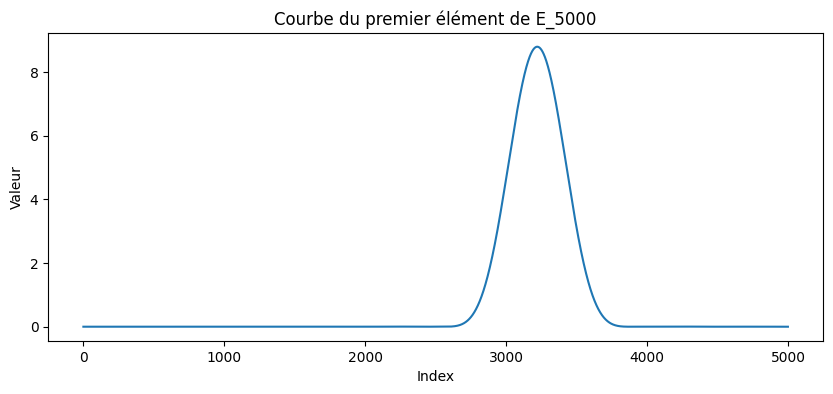

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(dataset_reduit['E_5000'].iloc[0])
plt.xlabel("Index")
plt.ylabel("Valeur")
plt.title("Courbe du premier élément de E_5000")
plt.show()

In [24]:
# Séparation du dataset en deux DataFrames

# DataFrame des features (X et y)
x_data = dataset_reduit[['w', 'DC', 'pitch', 'k']].copy()
y_data = np.stack(dataset_reduit['E_5000'].values)

# DataFrame des labels
label_data = dataset_reduit[['nombre_de_pics_5000']].copy()

print("x_data shape:", x_data.shape)
print("y_data shape:", y_data.shape)
print("label_data shape:", label_data.shape)

x_data shape: (9801, 4)
y_data shape: (9801, 5000)
label_data shape: (9801, 1)


In [25]:
# Sauvegarde des datasets au format .npy
np.save('data/x_data.npy', x_data.values)
np.save('data/y_data.npy', y_data)
np.save('data/label_data.npy', label_data.values)
print("Datasets sauvegardés dans le dossier data/")

Datasets sauvegardés dans le dossier data/
